In [1]:
#initial imports
from collections import Counter
from IPython.display import clear_output
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
import seaborn as sns
import sys
import time
#BeautifulSoup
from bs4 import BeautifulSoup
#gensim
import bz2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing
import gensim
from gensim import corpora
from gensim import models
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from gensim.models import Phrases
#NLTK
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords # Import the stop word list
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn import linear_model
#SpaCy
import spacy
spacy.load('en')
from spacy.lang.en import English

2019-02-26 10:49:09,668 : INFO : 'pattern' package not found; tag filters are not available for English
/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



3.1.0


In [2]:
df = pd.read_csv('~/Desktop/Final Capstone/jobs_db.csv')
pd.set_option('display.max_colwidth', -1)

In [3]:
df.head(10)

id  \
0  15   
1  16   
2  17   
3  18   
4  19   
5  20   
6  21   
7  22   
8  23   
9  24   

                                                                                                                                                                                                 title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                                                                  
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                                                                  
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                                                                
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                                                                    
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning</h3>   
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer, Natural Language Processing /NLP</h3>                                                                  
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing and Machine Learning Engineer</h3>                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Turn our df into X, for later use with modelling, train_test_split and getting a y column.

In [4]:
X = df

## EDA and Data Cleaning

Since we web scraped, the text is in pretty raw format.  To get it into useable shape, I plan to get rid of the html code before tokenizing and lemmatizing it. I'll also check for duplicates, and remove any to keep the results as clean as possible.  From here, it will be easier to determine what words can be added as stop words, or, are meaningful to the analysis in some way.

In [5]:
#Let's check for unique job descriptions. 
#If we drop some duplicates, we'll run our cleaning on less data, which is faster.
X.nunique()

id                 7882
title              3464
job_description    4334
job_class          9   
dtype: int64

In [6]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Computer Vision',
       'Text Analytics', 'Apache Spark', 'Speech Recognition',
       'Neural Networks'], dtype=object)

In [7]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Pattern Recognition            792
Text Analytics                 795
Neural Networks                827
Computer Vision                829
Natural Language Processing    881
Apache Spark                   919
Machine Learning               934
Speech Recognition             944
Text Mining                    961
Name: job_description, dtype: int64

In [8]:
#It stands to reason that we would want to keep the unique job descriptions, because titles like "Data Scientist"
#are broadly used in the field and not necessarily problematic for the scope of this project.
X = X.drop_duplicates(['job_description'], keep = 'last')

In [9]:
#Let's check to make sure we dropped what we had intended.
X.nunique()

id                 4334
title              3431
job_description    4334
job_class          9   
dtype: int64

In [10]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Computer Vision                633
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

The sum of our "female dominated fields is 1,500 which is 34.6% of our dataset. I'm going to drop rows that are Computer Vision job descriptions.  This should help even out the imbalance, and that particular field was the most "gender-balanced" out of the male-dominated job descriptions we have above.

In [11]:
#Dropping Computer Vision
X = X[X.job_class != 'Computer Vision']

In [12]:
X.reset_index(drop=True, inplace=True)

In [13]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

Although we lost a large portion of the dataset due to duplicates, it's important to prioritize quality over quantity. I evaluated the dataset to ensure that there would not be a class imbalance problem.  Now, our female-dominated fields comprise 40% of the job descriptions, this is pretty good considering we're working with scraped data. So, we'll proceed with cleaning up the dataset, so we can put it into BoW and Tf-Idf and then run some models on it!

In [15]:
#A quick view of the dataset to see what we might need to clean.
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Lots of HTML script here, as expected. Let's get some of that cleaned up before we tokenize.

In [16]:
X['job_description'] = X['job_description'].replace(r'div class="jobsearch-JobComponent-description icl-u-xs-mt--md"><div></div><div><div><div><b>', '', regex=True).replace(r'</div', '', regex=True)

In [17]:
X['title'] = X['title'].replace(r'<h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">', '', regex=True).replace(r'</h3>', '', regex=True)

In [18]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                     title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Much better, our job titles look really nice at this point. Onward!

In [19]:
X['job_description'] = X['job_description'].replace(r'<div class="jobsearch-JobComponent-description icl-u-xs-mt--md">', '', regex=True)


In [20]:
X.sample(10)

id                                  title  \
2128  5819  Staff Engineer - Security Engineering   
2247  5966  Business Intelligence/Data Engineer     
2486  6289  Relief Assistant Manager                
1820  5215  Full-Stack Developer                    
2836  6760  Contact Center Business Analyst         
746   1971  Neurodiagnostic Technologist - EEG      
2356  6098  Business Analyst                        
3522  7718  Deep Learning IQ Engineer               
1779  5005  Data Scientist                          
1704  4593  Front-end Software Developer            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [21]:
len(X)

3701

In [22]:
#This will get rid of most of the html markers that are within <>
def clean_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [23]:
start = time.time()
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_html(X['job_description'][i])
end = time.time()
print("Done in", end - start, "seconds")

Done in 4.640864133834839 seconds


In [24]:
X.sample(25)

id  \
2759  6648   
1350  3309   
1893  5502   
2775  6669   
1840  5352   
641   1114   
650   1127   
1160  3015   
786   2030   
2546  6363   
1140  2975   
3568  7775   
3413  7590   
1728  4785   
1490  3496   
2748  6636   
1265  3180   
2691  6570   
288   567    
304   599    
2920  6891   
1116  2918   
62    167    
944   2244   
1369  3340   

                                                                                title  \
2759  Software Engineer                                                                 
1350  Computer Vision / Machine Learning Engineer                                       
1893  GTM Sourcer                                                                       
2775  Senior / Lead Research Scientist - Salesforce Research                            
1840  Senior Engineer, Algorithms                                                       
641   Fraud Analytics Risk Senior Manager                                               
650   Senior Data Scientist                                                             
1160  Vice President/General Manager Machine Learning                                   
786   AI Engineer- Technology Development Group                                         
2546  Sr Compiler Manager                                                               
1140  Machine Learning Engineer                                                         
3568  Global Data Science Instructor                                                    
3413  Machine Learning Ecosystem Engineer - Core ML                                     
1728  Software Engineer (Frontend)                                                      
1490  Research Scientist (Machine Learning/Deep Learning)                               
2748  Senior Product Manager                                                            
1265  Machine Learning Engineer - Energy Optimization                                   
2691  Business Intelligence Developer, Information Services                             
288   Software Engineer - Backend                                                       
304   Senior Data Scientist                                                             
2920  Certified Nursing Assistant                                                       
1116  Machine Learning Cloud Consultant - Artificial Intelligence &amp; Deep Learning   
62    Computational Linguist Intern, Summer 2018                                        
944   Big Data Engineer III                                                             
1369  Senior Machine Learning Researcher                                                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

That worked like a charm! Let's continue cleaning.

In [25]:
X['job_description'] = X['job_description'].replace(r'\n', ' ', regex=True)

In [26]:
X.sample(25)

id  \
2879  6834   
2889  6855   
1983  5624   
3224  7308   
3314  7459   
3408  7585   
1596  4452   
1870  5474   
586   1039   
1787  5048   
3624  7832   
1050  2770   
1469  3469   
127   282    
3166  7242   
2364  6107   
233   482    
2589  6429   
2700  6580   
3303  7446   
2429  6211   
3668  7877   
223   453    
46    137    
1831  5281   

                                                                             title  \
2879  Overnight Manager                                                              
2889  Front End / Ruby on Rails Developer                                            
1983  Benefits Manager                                                               
3224  Solution Architect Big Data                                                    
3314  Machine Learning Scientist                                                     
3408  Software System Engineer - Legion                                              
1596  VOC Analytics Senior Manager                                                   
1870  Software Engineer - Spark and ML Runtime Infrastructure                        
586   Maintenance Analyst                                                            
1787  Software Engineer, Compute Engine                                              
3624  Image Data Scientist                                                           
1050  Machine Learning Researcher                                                    
1469  Medicaid Fraud Control Unit - Research Analyst NYC (Ref# MFCU_RSA_NYC_6087)    
127   Adjunct Lecturer, Analytics Frameworks &amp; Methods II (ONLINE, Sum'19)       
3166  Advanced Systems Lab - Neural Processor (Deep Learning) Sr Software Engineer   
2364  Data Scientist                                                                 
233   Data Scientist/Machine Learning/NLP Scientist                                  
2589  Data Integrity Manager                                                         
2700  Software Design Engineer II                                                    
3303  Quality and Infrastructure Manager                                             
2429  Voice Designer - Alexa                                                         
3668  Data Scientist - Payments / FinTech - A FORTUNE Top 50 Best Small Work Place   
223   Deep learning software engineer                                                
46    Data Scientist I                                                               
1831  IM Telematics Database Developer                                               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [27]:
X['job_description'] = X['job_description'].replace(r'&amp;', ' ', regex=True)

In [28]:
X['title'] = X['title'].replace(r'&amp;', ' ', regex=True)

In [29]:
X.sample(25)

id                                            title  \
1834  5307  Data Science   Machine Learning Team              
2508  6313  Siri - Program Manager: Personal Productivity     
2761  6650  Senior Software Developer                         
546   984   Data   Applied Scientist                          
1323  3274  Associate Application Developer                   
3455  7636  Research Scientist, Natural Language Processing   
1626  4488  Program Integrity Healthcare Data Analyst         
1597  4453  Data Scientist- People Insights                   
3484  7671  Specialist, Model Development                     
2943  6918  Senior iOS Engineer                               
1174  3040  Research Intern - Immunomics                      
1879  5484  Hadoop Developer                                  
1761  4948  Engineering Manager, Payments                     
1777  4997  Senior System Engineer                            
2177  5873  Staff Machine Learning Engineer                   
143   304   Data Scientist                                    
1431  3421  Economist                                         
114   261   Communications Product Manager                    
3039  7085  AI Research Engineer - Systems and Experiences    
2334  6076  Senior Associate Software Engineer                
2869  6812  Operational Risk Analyst - VA                     
2095  5778  Software Engineer 3                               
1314  3260  Research Intern - DMX Systems                     
2356  6098  Business Analyst                                  
1115  2917  Data Scientist - Comm Apps                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [30]:
X['job_description'] = X['job_description'].replace(r'>', ' ', regex=True)

In [31]:
X.sample(25)

id                                                      title  \
367   698   Data Support Analyst - Entry-Level - Technology Startup     
3649  7857  Data Scientist                                              
395   735   Senior Data Engineer                                        
1654  4521  Senior Data Scientist - Open Source                         
3248  7343  Manager Portfolio Analytics                                 
763   1993  Power Optimization Center (POC) Operations Specialist       
2089  5771  Big Data Engineer                                           
1459  3456  CVML, Failure-Analysis Data Engineer                        
3072  7126  Campus Data Scientist - Experiences   Rentals               
1465  3465  Intern - Modeling   Operations                              
313   617   Implementation Manager                                      
784   2028  Technical Inside Sales Representative                       
3124  7189  Artificial Intelligence (AI) Software Engineer              
2066  5738  Big Data Engineer- Fulltime- San Diego, CA                  
1342  3298  Cognitive Software Developer Intern May 2019 12-16 months   
326   636   Senior Associate, Data Science                              
3237  7321  Adversarial Biological Learning                             
6     37    Analytical Linguist, Google AI                              
807   2059  Data Scientist                                              
1867  5471  Associate Software Developer                                
570   1019  Senior Data Scientist / Pre-Sales Support                   
3602  7809  Data Scientist                                              
3244  7335  Director of Software Development                            
2488  6291  STOREKEEPER 1-020619-173900                                 
2650  6517  Technical Sales Representative-Georgia                      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

The last regex left quite a bit of whitespace, which isn't useful. Let's strip that before moving on.

In [32]:
X['job_description'] = X['job_description'].str.strip()

In [33]:
X.sample(25)

id                                                   title  \
3560  7765  Image Processing Algorithm Engineer                      
1051  2771  Machine Learning                                         
2153  5848  Sr. Applied Scientist                                    
1281  3210  Senior Data Scientist - Machine Learning / NLP           
3594  7801  Data Scientist                                           
2917  6887  Enterprise Data Scientist, Emerging Technologies         
1386  3364  Data Scientist, Engineering                              
1695  4576  Senior Analytics Consultant – Cost Accounting            
149   317   Account Manager                                          
1432  3422  Artificial Intelligence / Machine Learning SME, #3573    
1628  4490  Data Scientist - Customer Experience                     
2636  6497  Customer Program Manager - Alexa Data Services           
889   2169  Security Officer $13.50 SRO Position Full Time           
1449  3444  Data Science Intern                                      
2324  6064  Full Stack Software Engineer - Java                      
1135  2964  Data Strategy/Machine Learning BA                        
1828  5274  Java Engineer III - API                                  
2850  6776  QA/TEST ENGINEER                                         
507   891   Research Scientist - Salesforce Research (Entry Level)   
440   803   Data Solutions Architect I                               
52    149   Data Scientist - Oracle Health Sciences                  
40    110   Data Engineer                                            
2180  5876  Senior Data Engineer                                     
754   1981  Sr. Predictive Data Scientist (Data Scientist 4)         
656   1134  Senior Data Scientist                                    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [34]:
#We don't need the ids that populated in the SQLite Database
X = X.drop(['id'], axis=1)

In [35]:
X.head(10)

title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [36]:
#Let's remove punctuation.
def punctuation_remover(row):
    punctuation = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~«»'  
    
    punctuationNoPeriod = "[" + re.sub("\.","", punctuation) + "]"
    row = re.sub(punctuationNoPeriod, " ", str(row))
    #to remove double white spaces and create space after %,
    row = row.replace('  ', ' ')
    row = row.replace('%', '% ')
    return row.strip()

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<ipython-input-36-b2830c59b60e>:5: DeprecationWarning:

invalid escape sequence \.



In [37]:
# remove punctuation from the job titles first
X['title'] = X['title'].apply(punctuation_remover)

In [38]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [39]:
#Since that worked well, let's now remove punctuation from the job descriptions.
X['job_description'] = X['job_description'].apply(punctuation_remover)

In [40]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
X['gender_breakdown'] = X['job_class']

In [42]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [43]:
X.loc[X['gender_breakdown'] == 'Natural Language Processing', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Mining', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Analytics', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Speech Recognition', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Pattern Recognition', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Machine Learning', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Apache Spark', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Neural Networks', 'gender_breakdown'] = 0

In [44]:
X.sample(5)

title  \
2739  Corporate Trainer I                        
1869  Engineering Manager  Runtime               
1097  Robotics Machine Learning for Navigation   
2288  Senior DevOps Engineer HPC UMKA            
2185  System Engineer Security Focus             

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## Unsupervised Approach

I'll use the Latend Dirichlet Allocation method first, and then use it with bigrams and trigrams. I will evalute for coherence, and tune the models.

In [45]:
#First step, tokenizer.
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [46]:
nltk.download('wordnet')
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyfrench/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'microsoft',
                               'ai', 'ml', 'nlp', 'speech', 'natural', 'engineers', 'cloud',
                               'intelligence', 'aws']))

In [48]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [49]:
import random
text_data = []
for text in X:
    for i in range(len(X)):
        tokens = prepare_text_for_lda(X['job_description'][i])
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['bachelor', 'higher', 'degree', 'relevant', 'field', 'linguistics', 'years', 'computational', 'linguistics', 'processing', 'semantics', 'syntax', 'annotation', 'form', 'markup', 'working', 'multiple', 'language', 'native', 'native', 'fluency', 'dutch', 'amazon', 'looking', 'dutch', 'engineer', 'processing', 'seeking', 'candidate', 'strong', 'analytical', 'skill', 'develop', 'component', 'variety', 'amazon', 'product', 'dutch', 'engineer', 'amazon', 'create', 'sample', 'target', 'dutch', 'develop', 'component', 'write', 'rule', 'build', 'grammar', 'create', 'annotation', 'system', 'mapping', 'target', 'contribute', 'design', 'feature', 'extend', 'exist', 'annotation', 'schema', 'cover', 'area', 'target', 'modeling', 'tool', 'bootstrap', 'functionality', 'analyze', 'performance', 'identify', 'area', 'improvement', 'collaborate', 'associate', 'team', 'collection', 'development', 'effort']
['seek', 'exceptional', 'postdoc', 'researcher', 'area', 'reinforcement', 'artificial', 'relate', 'f

['headquarter', 'heart', 'silicon', 'valley', 'moveworks', 'enterprise', 'company', 'solving', 'complex', 'problem', 'using', 'latest', 'technology', 'back', 'industry', 'leaders', 'capital', 'lightspeed', 'venture', 'found', 'recognize', 'serial', 'entrepreneur', 'moveworks', 'transform', 'market', 'autonomous', 'resolution', 'product', 'define', 'customer', 'already', 'asking', 'demand', 'astound', 'engineer', 'opportunity', 'challenge', 'application', 'resolve', 'critical', 'enterprise', 'customer', 'skilled', 'large', 'scale', 'infrastructure', 'modeling', 'processing', 'information', 'retrieval', 'within', 'complex', 'system', 'could', 'excite', 'opportunity', 'responsibility', 'apply', 'method', 'unstructured', 'complex', 'system', 'knowledge', 'fundamentals', 'develop', 'execute', 'algorithm', 'evaluate', 'small', 'scale', 'experiment', 'later', 'productionize', 'solution', 'scale', 'investigate', 'solve', 'excite', 'difficult', 'challenge', 'classification', 'content', 'develop

['background', 'area', 'signal', 'processing', 'pattern', 'recognition', 'detection', 'estimation', 'theory', 'application', 'relate', 'developing', 'algorithm', 'interpretation', 'clinical', 'decision', 'support', 'mobile', 'health', 'monitoring']
['motesque', 'young', 'growing', 'company', 'specialize', 'smart', 'intelligent', 'motion', 'system', 'sport', 'health', 'ergonomics', 'working', 'internationally', 'successful', 'know', 'brand', 'partner', 'offer', 'completely', 'analyze', 'human', 'movement', 'making', 'findings', 'economically', 'viable', 'office', 'brooklyn', 'cologne', 'germany', 'global', 'reach', 'system', 'instal', 'world', 'motesque', 'tackle', 'excite', 'problem', 'secure', 'pattern', 'recognition', 'physics', 'simulation', 'accessible', 'looking', 'start', 'friendly', 'front', 'software', 'engineer', 'product', 'impact', 'position', 'base', 'office', 'working', 'design', 'develop', 'single', 'application', 'host', 'fleet', 'manage', 'devices', 'internet', 'design'

['facebook', 'mission', 'people', 'power', 'build', 'community', 'bring', 'world', 'closer', 'together', 'family', 'services', 'building', 'different', 'company', 'connect', 'billion', 'people', 'around', 'world', 'give', 'share', 'matter', 'help', 'bring', 'people', 'closer', 'together', 'whether', 'create', 'product', 'helping', 'small', 'expand', 'reach', 'people', 'facebook', 'builder', 'heart', 'global', 'team', 'constantly', 'iterate', 'solving', 'problem', 'working', 'together', 'empower', 'people', 'around', 'world', 'build', 'community', 'connect', 'meaningful', 'together', 'people', 'build', 'strong', 'community', 'getting', 'start', 'facebook', 'seeking', 'community', 'integrity', 'engineering', 'responsible', 'identify', 'remediate', 'objectionable', 'content', 'facebook', 'examine', 'photo', 'video', 'anything', 'decide', 'contain', 'nudity', 'pornography', 'violence', 'computer', 'vision', 'graph', 'large', 'scale', 'system', 'programming', 'ensure', 'people', 'facebook',

['sentieo', 'power', 'future', 'financial', 'market', 'create', 'dynamic', 'revolutionary', 'central', 'public', 'equity', 'sentieo', 'financial', 'terminal', 'reimagined', 'vision', 'accelerate', 'human', 'productivity', 'collaboration', 'fundamentally', 'improve', 'workflow', 'knowledge', 'economy', 'professional', 'build', 'former', 'hedge', 'analyst', 'allow', 'professional', 'drastically', 'increase', 'speed', 'coverage', 'without', 'sacrifice', 'depth', 'enable', 'focus', 'meaningful', 'humans', 'series', 'funding', 'round', 'excite', 'propel', 'sentieo', 'phase', 'company', 'global', 'growth', 'advance', 'unprecedented', 'product', 'development', 'accelerate', 'scaling', 'expansion', 'reimagine', 'future', 'fintech', 'sentieo', 'financial', 'terminal', 'reimagined', 'looking', 'highly', 'qualify', 'scientist', 'build', 'excellent', 'service', 'customer', 'looking', 'senior', 'scientist', 'database', 'million', 'financial', 'document', 'order', 'develop', 'tool', 'user', 'better'

['internship', 'location', 'melbourne', 'unite', 'state', 'america', 'thales', 'people', 'architect', 'solution', 'enable', 'third', 'plane', 'safely', 'create', 'flight', 'entertainment', 'system', 'engross', 'million', 'flier', 'every', 'develop', 'avionics', 'control', 'world', 'large', 'commercial', 'aircraft', 'simulator', 'train', 'generation', 'pilot', 'fighter', 'transporter', 'search', 'rescue', 'helicopter', 'together', 'every', 'member', 'aerospace', 'make', 'difference', 'together', 'ambition', 'tomorrow', 'happen', 'today', 'airline', 'connect', 'flight', 'thales', 'increasingly', 'pace', 'world', 'unpredictable', 'predictable', 'connect', 'entertain', 'passenger', 'better', 'combining', 'diversity', 'talent', 'master', 'decisive', 'moment', 'matter', 'passenger', 'airline', 'whatever', 'take', 'excite', 'curious', 'working', 'large', 'scale', 'highly', 'complex', 'project', 'eager', 'innovate', 'unsolved', 'problem', 'drive', 'completion', 'respond', 'please', 'currently'

['passionate', 'transformation', 'bringing', 'innovative', 'continually', 'learn', 'implement', 'technology', 'solve', 'problem', 'enjoy', 'working', 'close', 'energizing', 'environment', 'empower', 'locate', 'developer', 'analyst', 'manager', 'locate', 'triangle', 'office', 'office', 'running', 'across', 'country', 'across', 'globe', 'operate', 'agile', 'mindset', 'every', 'single', 'continually', 'improve', 'technical', 'expertise', 'delivery', 'engage', 'application', 'development', 'complex', 'problem', 'determination', 'number', 'source', 'emerge', 'technology', 'engineering', 'leader', 'expect', 'area', 'quickly', 'previous', 'variety', 'programming', 'language', 'protocol', 'demonstrate', 'agile', 'programming', 'debug', 'skill', 'exposure', 'technology', 'product', 'source', 'technology', 'evaluate', 'latest', 'technology', 'figure', 'implement', 'responsibility', 'produce', 'solution', 'ibmers', 'excel', 'aesthetics', 'performance', 'reliability', 'scalability', 'collaborate',

['huntsville', 'alabama', 'unite', 'state', 'bbapp4', 'hundred', 'years', 'boeing', 'designing', 'building', 'generation', 'aerospace', 'technology', 'today', 'industry', 'transform', 'autonomy', 'leading', 'innovation', 'integration', 'system', 'vehicle', 'transform', 'world', 'transport', 'passenger', 'employee', 'dynamic', 'distribute', 'environment', 'initiative', 'contribution', 'member', 'critical', 'success', 'project', 'multi', 'successful', 'transition', 'integration', 'capability', 'boeing', 'product', 'development', 'deployment', 'project', 'fund', 'independent', 'development', 'internal', 'application', 'development', 'contract', 'development', 'support', 'advance', 'central', 'development', 'organization', 'boeing', 'company', 'boeing', 'provide', 'innovative', 'technology', 'enable', 'development', 'future', 'aerospace', 'solution', 'improve', 'cycle', 'quality', 'performance', 'exist', 'boeing', 'product', 'services', 'looking', 'processing', 'advance', 'technologist', '

['ready', 'career', 'level', 'servicelink', 'provider', 'mortgage', 'services', 'industry', 'seek', 'individual', 'solid', 'history', 'mortgage', 'estate', 'industry', 'engineer', 'candidate', 'guide', 'engineering', 'engineer', 'responsible', 'provide', 'advance', 'technical', 'skill', 'leadership', 'design', 'development', 'control', 'accountable', 'cycle', 'consult', 'design', 'modeling', 'coding', 'testing', 'documentation', 'company', 'warehouse', 'engineer', 'proactively', 'investigate', 'opportunity', 'increase', 'value', 'focus', 'project', 'improve', 'process', 'implement', 'solution', 'capture', 'store', 'event', 'drive', 'process', 'need', 'deliver', 'present', 'demonstration', 'component', 'project', 'stakeholder', 'integrate', 'component', 'ingestion', 'pipeline', 'ensure', 'catalog', 'search', 'index', 'maintain', 'always', 'implement', 'deliver', 'additional', 'project', 'component', 'interface', 'accessibility', 'implement', 'secure', 'solution', 'align', 'privacy', 'se

['great', 'people', 'great', 'benefit', 'maintenance', 'specialist', 'summary', 'maintenance', 'specialist', 'assist', 'performing', 'aspect', 'maintenance', 'repair', 'mechanical', 'structural', 'electrical', 'equipment', 'system', 'assign', 'location', 'essential', 'function', 'receive', 'direction', 'maintenance', 'manager', 'assist', 'overall', 'maintenance', 'repair', 'assign', 'operations', 'conduct', 'schedule', 'inspection', 'designate', 'building', 'equipment', 'check', 'repair', 'equipment', 'malfunction', 'major', 'repair', 'electrical', 'plumbing', 'heating', 'conditioning', 'refrigeration', 'equipment', 'need', 'respond', 'immediately', 'resolve', 'emergency', 'facility', 'need', 'issue', 'regard', 'safety', 'security', 'requirement', 'include', 'alarm', 'system', 'disengage', 'electrical', 'water', 'system', 'necessary', 'secure', 'building', 'facility', 'monitor', 'activate', 'reset', 'automatic', 'security', 'system', 'appropriate', 'assist', 'manager', 'inventory', 'se

['thirty', 'years', 'development', 'manchester', 'hampshire', 'house', 'large', 'industrial', 'complex', 'historic', 'amoskeag', 'millyard', 'employ', 'hundred', 'professional', 'whose', 'engineering', 'design', 'manufacturing', 'quality', 'expertise', 'create', 'innovative', 'solution', 'advance', 'technology', 'locate', 'boston', 'beach', 'mountain', 'leading', 'development', 'company', 'country', 'birthplace', 'innovative', 'change', 'product', 'engineer', 'rapidly', 'growing', 'autonomous', 'robotics', 'unique', 'opportunity', 'define', 'implement', 'neural', 'network', 'pipeline', 'bring', 'artificial', 'state', 'improve', 'life', 'hands', 'working', 'team', 'across', 'building', 'designing', 'shipping', 'project', 'positive', 'endure', 'impact', 'million', 'people', 'worldwide', 'objective', 'design', 'apply', 'algorithm', 'evaluate', 'performance', 'world', 'simulate', 'translate', 'generate', 'algorithm', 'production', 'level', 'collaborate', 'various', 'team', 'achieve', 'obje

['tusimple', 'found', 'bringing', 'mind', 'world', 'together', 'achieve', 'dream', 'driverless', 'truck', 'solution', 'foundation', 'computer', 'vision', 'algorithm', 'mapping', 'tusimple', 'working', 'create', 'first', 'commercially', 'viable', 'autonomous', 'truck', 'driving', 'platform', 'level', 'safety', 'description', 'help', 'autonomous', 'sense', 'perceive', 'world', 'important', 'create', 'novel', 'algorithm', 'advance', 'perception', 'apply', 'algorithm', 'terabyte', 'successful', 'applicant', 'expert', 'building', 'generation', 'autonomous', 'sensing', 'algorithm', 'responsibility', 'prototype', 'developing', 'using', 'special', 'focus', 'perception', 'problem', 'autonomous', 'driving', 'qualification', 'relate', 'academic', 'program', 'equivalent', 'practical', 'sound', 'understanding', 'literature', 'excellent', 'programming', 'least', 'following', 'language', 'python', 'familiarity', 'least', 'following', 'neural', 'network', 'framework', 'mxnet', 'prefer', 'tensorflow', 

['growing', 'dynamic', 'company', 'working', 'latest', 'contract', 'across', 'country', 'company', 'list', 'years', 'fast', 'growing', 'company', 'offer', 'great', 'company', 'culture', 'competitive', 'salary', 'bonus', 'potential', 'superior', 'benefit', 'package', 'responsibility', 'description', 'seeking', 'scientist', 'support', 'unite', 'state', 'special', 'operations', 'command', 'ussocom', 'community', 'duty', 'limited', 'responsible', 'improve', 'access', 'understanding', 'demonstrate', 'expertise', 'management', 'process', 'development', 'modeling', 'apply', 'develop', 'scientific', 'methodology', 'statistics', 'algorithm', 'discover', 'frame', 'relevant', 'problem', 'hypothesis', 'opportunity', 'develop', 'predictive', 'prescriptive', 'modeling', 'processing', 'mining', 'processing', 'recommendation', 'clustering', 'forecasting', 'method', 'advance', 'statistical', 'technique', 'design', 'automate', 'process', 'facilitate', 'manipulation', 'manage', 'integrate', 'across', 'di

['looking', 'scientist', 'analyze', 'large', 'amount', 'information', 'pattern', 'improve', 'company', 'build', 'product', 'extract', 'valuable', 'insight', 'highly', 'analytical', 'knack', 'statistics', 'critical', 'thinking', 'problem', 'solving', 'skill', 'essential', 'interpreting', 'company', 'analyze', 'trend', 'better', 'decision', 'role', 'develop', 'statistical', 'model', 'define', 'measure', 'intangible', 'metrics', 'communicate', 'idea', 'leadership', 'implement', 'statistical', 'mathematical', 'method', 'need', 'specific', 'model', 'develop', 'solution', 'appropriate', 'database', 'parameter', 'robust', 'pattern', 'recognition', 'predictive', 'modeling', 'skill', 'statistical', 'programming', 'language', 'recommend', 'extensive', 'years', 'mining']
['micro', 'system', 'engineering', 'pioneer', 'developing', 'innovative', 'technology', 'medical', 'devices', 'enhance', 'quality', 'million', 'individual', 'living', 'cardiovascular', 'disorder', 'company', 'dedicate', 'design',

['overview', 'consumer', 'electronics', 'looking', 'expert', 'apply', 'problem', 'gesture', 'activity', 'recognition', 'responsible', 'developing', 'algorithm', 'updating', 'algorithm', 'base', 'feedback', 'field', 'testing', 'closely', 'embed', 'software', 'engineering', 'team', 'integrate', 'algorithm', 'product', 'seeking', 'candidate', 'digital', 'signal', 'processing', 'area', 'responsibility', 'primary', 'developer', 'accurate', 'efficient', 'algorithm', 'analyze', 'human', 'motion', 'sensor', 'input', 'primarily', 'sensor', 'detecting', 'human', 'movement', 'using', 'sensor', 'fusion', 'multi', 'device', 'multi', 'sensor', 'methodology', 'tracking', 'classify', 'quantify', 'movement', 'gesture', 'refine', 'algorithm', 'base', 'feedback', 'engineering', 'team', 'customer', 'implement', 'optimize', 'support', 'implementation', 'algorithm', 'member', 'algorithm', 'consumer', 'electronics', 'product', 'contribute', 'project', 'within', 'group', 'minimum', 'qualification', 'years', '

['mandatory', 'skill', 'description', 'skill', 'require', 'mandatory', 'senior', 'architect', 'responsible', 'provide', 'technical', 'leadership', 'large', 'complexity', 'order', 'value', 'enterprise', 'scale', 'project', 'solution', 'expect', 'depth', 'breadth', 'knowledge', 'specify', 'multiple', 'technological', 'area', 'architectural', 'area', 'include', 'knowledge', 'applicable', 'process', 'methodology', 'standard', 'product', 'framework', 'would', 'responsible', 'defining', 'document', 'architecture', 'capture', 'document', 'functional', 'architectural', 'requirement', 'prepare', 'estimate', 'defining', 'technical', 'solution', 'proposal', 'provide', 'technical', 'leadership', 'architect', 'require', 'guide', 'architect', 'would', 'responsible', 'specific', 'architectural', 'architecture', 'solution', 'collaborate', 'multiple', 'team', 'wipro', 'arrive', 'technical', 'tactical', 'decision', 'contribute', 'adopt', 'practice', 'reuse', 'defect', 'prevention', 'process', 'optimizat

['basic', 'qualification', 'graduate', 'degree', 'electrical', 'engineering', 'computer', 'science', 'mathematics', 'specialization', 'recognition', 'processing', 'familiar', 'programming', 'language', 'python', 'amazon', 'looking', 'passionate', 'talented', 'inventive', 'scientist', 'strong', 'background', 'build', 'industry', 'leading', 'mission', 'envelope', 'automatic', 'recognition', 'understanding', 'audio', 'signal', 'processing', 'order', 'provide', 'possible', 'customer', 'scientist', 'talented', 'peer', 'develop', 'novel', 'algorithm', 'modeling', 'technique', 'advance', 'state', 'speak', 'understanding', 'directly', 'impact', 'customer', 'product', 'services', 'leverage', 'amazon', 'heterogeneous', 'source', 'large', 'scale', 'computing', 'resource', 'accelerate', 'advance', 'speak', 'understanding', 'hire', 'area', 'speak', 'understanding', 'dialog', 'management']
['lakesidenursingcenter', 'complete', 'applicationcertified', 'nursing', 'assistant', 'position', 'available', 

['amazon', 'strategic', 'recruit', 'seeking', 'talented', 'focus', 'campaign', 'manager', 'recruit', 'organization', 'supporting', 'amazon', 'team', 'globally', 'recruit', 'specialize', 'executive', 'talent', 'specialize', 'fields', 'strategic', 'recruit', 'focus', 'building', 'specialize', 'talent', 'community', 'design', 'apply', 'include', 'computer', 'vision', 'recognition', 'processing', 'optimization', 'economics', 'sustainability', 'hardware', 'robotics', 'globally', 'amazon', 'build', 'team', 'emerge', 'fields', 'recruit', 'senior', 'design', 'leaders', 'talent', 'function', 'develop', 'amazon', 'presence', 'gathering', 'drive', 'academic', 'relations', 'facilitate', 'internal', 'community', 'effort', 'effort', 'support', 'amazon', 'development', 'business', 'alexa', 'amazon', 'ensure', 'state', 'design', 'forefront', 'amazon', 'mature', 'organization', 'project', 'manager', 'oversee', 'execution', 'annual', 'calendar', 'strategic', 'recruitment', 'campaign', 'start', 'finish',

['temporary', 'statewide', 'pediatrics', 'director', 'design', 'manage', 'evaluate', 'across', 'clinical', 'site', 'offering', 'keeping', 'overall', 'school', 'objective', 'recommendation', 'curriculum', 'committee', 'standing', 'subcommittee', 'relevant', 'national', 'recommendation', 'direct', 'subject', 'matter', 'director', 'communicate', 'expectation', 'participation', 'implementation', 'student', 'staff', 'instructor', 'administration', 'faculty', 'monitor', 'overall', 'accomplishment', 'course', 'necessary', 'significant', 'revision', 'content', 'approve', 'statewide', 'pediatrics', 'director', 'need', 'remain', 'inform', 'trend', 'practice', 'medical', 'education', 'pedagogy', 'administration', 'planning', 'involve', 'consultation', 'staff', 'instructor', 'administration', 'faculty', 'director', 'responsible', 'developing', 'maintain', 'vision', 'short', 'development', 'activity', 'ongoing', 'effort', 'entail', 'development', 'planning', 'reporting', 'monitoring', 'director', '

['looking', 'senior', 'apply', 'scientist', 'nvidia', 'search', 'senior', 'apply', 'researcher', 'strong', 'background', 'apply', 'ranking', 'recommendation', 'system', 'develop', 'algorithm', 'training', 'network', 'ranking', 'recommendation', 'prediction', 'task', 'collaborate', 'expert', 'apply', 'scientist', 'accelerate', 'scale', 'source', 'algorithm', 'demonstrate', 'improve', 'recommendation', 'system', 'example', 'predictive', 'modeling', 'improve', 'limited', 'content', 'recommendation', 'system', 'fraud', 'detection', 'engagement', 'prediction', 'placement', 'anomaly', 'detection', 'developing', 'training', 'algorithm', 'sparse', 'graph', 'tabular', 'demonstrate', 'algorithm', 'perform', 'better', 'traditional', 'base', 'method', 'transfer', 'partner', 'latest', 'algorithm', 'model', 'architecture', 'collaborate', 'researcher', 'leading', 'university', 'industrial', 'equivalent', 'computer', 'electrical', 'engineering', 'artificial', 'apply', 'relate', 'field', 'excellent', '

['internship', 'responsibility', 'apply', 'state', 'methodology', 'support', 'broad', 'product', 'strategy', 'translate', 'advance', 'problem', 'technical', 'approach', 'diverse', 'domain', 'vendor', 'recommendation', 'scheduling', 'technician', 'dispatch', 'improve', 'automate', 'process', 'proprietary', 'tool', 'apply', 'mining', 'technique', 'recommendation', 'base', 'communicate', 'result', 'insightful', 'visualization', 'report', 'presentation', 'collaborate', 'internal', 'team', 'develop', 'refine', 'scale', 'procedure', 'workflow', 'perform', 'project', 'duty', 'assign', 'specific', 'skill', 'strong', 'problem', 'solving', 'skill', 'emphasis', 'product', 'development', 'using', 'script', 'language', 'tool', 'python', 'manipulate', 'insight', 'large', 'datasets', 'using', 'framework', 'scikit', 'learn', 'torch', 'shogun', 'understanding', 'tool', 'database', 'architecture', 'drive', 'learn', 'master', 'technology', 'technique', 'familiar', 'following', 'software', 'tool', 'platfo

['application', 'analyst', 'multi', 'disciplinary', 'informaticians', 'biostatisticians', 'clinician', 'project', 'involve', 'development', 'processing', 'tool', 'electronic', 'medical', 'record', 'tool', 'develop', 'using', 'canary', 'platform', 'canary', 'harvard', 'source', 'base', 'software', 'create', 'group', 'processing', 'within', 'reach', 'everyone', 'need', 'application', 'analyst', 'participate', 'cleaning', 'transformation', 'integration', 'statistical', 'extensive', 'participation', 'project', 'possible', 'interest', 'development', 'processing', 'tool', 'using', 'canary', 'platform', 'evaluation', 'accuracy', 'processing', 'tool', 'standard', 'manual', 'annotation', 'preparation', 'document', 'describe', 'development', 'evaluation', 'procedure', 'result', 'identification', 'reporting', 'technical', 'issue', 'canary', 'platform', 'testing', 'release', 'canary', 'platform', 'qualification', 'bachelor', 'degree', 'require', 'computer', 'programming', 'require', 'background', 

['candidate', 'participate', 'system', 'engineering', 'early', 'career', 'program', 'focus', 'development', 'system', 'engineering', 'skill', 'applicable', 'company', 'product', 'portfolio', 'candidate', 'perform', 'variety', 'system', 'engineering', 'task', 'assignment', 'promote', 'development', 'technical', 'strategic', 'engineering', 'leadership', 'interpersonal', 'skill', 'structure', 'framework', 'within', 'engineering', 'discipline', 'mechanical', 'electrical', 'system', 'candidate', 'require', 'cross', 'functional', 'environment', 'performing', 'task', 'assignment', 'emphasizing', 'development', 'technical', 'strategic', 'leadership', 'interpersonal', 'skill', 'structure', 'framework', 'within', 'engineering', 'discipline', 'mechanical', 'electrical', 'software', 'system', 'communication', 'skill', 'environment', 'solve', 'cross', 'functional', 'technical', 'problem', 'task', 'initial', 'requirement', 'specification', 'development', 'product', 'specification', 'technique', 'sat

['raytheon', 'space', 'airborne', 'system', 'system', 'engineering', 'integration', 'electronic', 'warfare', 'electronic', 'support', 'system', 'department', 'require', 'experience', 'system', 'engineer', 'goleta', 'prove', 'developing', 'innovative', 'solution', 'fighter', 'need', 'support', 'relate', 'electronic', 'support', 'electronic', 'attack', 'capability', 'development', 'raytheon', 'product', 'video', 'raytheon', 'capability', 'position', 'require', 'strong', 'initiative', 'communication', 'collaboration', 'personnel', 'software', 'hardware', 'design', 'center', 'position', 'require', 'candidate', 'apply', 'electronic', 'warfare', 'principle', 'electronic', 'support', 'concept', 'support', 'cohesive', 'compliant', 'technical', 'baseline', 'performance', 'candidate', 'senior', 'tackle', 'challenge', 'project', 'individual', 'challenge', 'assignment', 'keeping', 'skill', 'could', 'combination', 'technical', 'concept', 'demonstration', 'modeling', 'simulation', 'product', 'design

['http', 'lever', 'client', 'logos', 'amazonaws', 'b67910ec', '9bf219ea7d50', '1495723288350', 'analyst', 'moneylion', 'leading', 'mobile', 'finance', 'platform', 'empower', 'consumer', 'control', 'financial', 'life', 'spending', 'saving', 'credit', 'tracking', 'tool', 'smart', 'credit', 'product', 'found', 'leading', 'technologist', 'financier', 'moneylion', 'superior', 'base', 'degree', 'users’', 'personal', 'finances', 'enable', 'better', 'underwrite', 'development', 'tailor', 'financial', 'product', 'offer', 'build', 'social', 'endorsement', 'loyalty', 'point', 'reward', 'moneylion', 'endorse', 'financial', 'behavior', 'habit', 'building', 'looking', 'looking', 'analyst', 'drive', 'approach', 'growth', 'looking', 'someone', 'hands', 'approach', 'tracking', 'experimentation', 'optimization', 'someone', 'willing', 'spend', 'grasp', 'understanding', 'vertical', 'product', 'credit', 'marketing', 'acquisition', 'retention', 'study', 'dynamics', 'recommend', 'action', 'generate', 'improv

['engineer', 'postingby', 'intertwine', 'falls', 'alignment', 'philosophy', 'blast', 'utilize', 'reward', 'gaming', 'bring', 'balance', 'galaxy', 'intrigue', 'engineer', 'engineering', 'subject', 'matter', 'expert', 'create', 'maintain', 'pipeline', 'include', 'database', 'balancing', 'hands', 'polyglot', 'grandmaster', 'gamers', 'merging', 'world', 'gaming', 'bring', 'valuable', 'immersive', 'gaming', 'experience', 'improve', 'life', 'gamers', 'everywhere', 'opportunity', 'eventually', 'organization', 'within', 'fund', 'growing', 'company', 'questbuilding', 'deploy', 'production', 'engineering', 'systemsmake', 'architecture', 'decision', 'platformsfunction', 'agile', 'planning', 'development', 'processbuild', 'maintain', 'social', 'medium', 'marketing', 'attributionbuild', 'manage', 'processing', 'efficient', 'strain', 'resourceswrite', 'query', 'massive', 'database', 'integrate', 'productionbadges5', 'years', 'engineer', 'engineer', 'software', 'engineer2', 'years', 'working', 'speci

['environment', 'idea', 'contribution', 'really', 'matter', 'encourage', 'build', 'manage', 'first', 'class', 'cyber', 'security', 'product', 'suite', 'using', 'latest', 'cutting', 'base', 'technology', 'delta', 'looking', 'senior', 'highly', 'available', 'critical', 'platform', 'customer', 'depend', 'services', 'environment', 'secure', 'cyber', 'threat', 'critical', 'deliver', 'solution', 'depend', 'ideal', 'candidate', 'passion', 'making', 'base', 'system', 'securely', 'always', 'performance', 'responsibilitiesas', 'operations', 'responsible', 'manage', 'administrate', 'distribute', 'highly', 'available', 'system', 'running', 'awstuning', 'manage', 'volume', 'elasticsearch', 'cluster', 'streamline', 'systemresearch', 'implement', 'efficiency', 'improvement', 'across', 'services', 'platform', 'lower', 'costs', 'speed', 'processingbuild', 'integration', 'third', 'party', 'solution', 'using', 'microservices', 'serverless', 'modelsmonitor', 'measure', 'automate', 'things', 'ensure', 'exc

['platform', 'division', 'head', 'former', 'chief', 'scientist', 'watson', 'bowen', 'looking', 'scientist', 'silicon', 'valley', 'division', 'focus', 'algorithm', 'innovation', 'expand', 'retail', 'infrastructure', 'responsible', 'building', 'power', 'voice', 'base', 'application', 'devices', 'excite', 'opportunity', 'early', 'stage', 'modeling', 'problem', 'world', 'enormously', 'positive', 'impact', 'multiple', 'million', 'people', 'responsibility', 'developing', 'optimize', 'model', 'training', 'pipeline', 'iteration', 'building', 'publishing', 'production', 'model', 'follow', 'closely', 'trend', 'modeling', 'prototyping', 'productionizing', 'algorithm', 'qualification', 'computer', 'recognition', 'linux', 'script', 'language', 'python', 'shell', 'script', 'expertise', 'technology', 'recognition', 'translation', 'understanding', 'prefer', 'familiar', 'processing', 'using', 'familiar', 'least', 'toolkits', 'tensorflow', 'pytorch', 'mxnet', 'decent', 'analytic', 'problem', 'solving', 

['summary', 'post', 'weekly', 'hours', 'number', '200005580', 'revolution', 'human', 'computer', 'interaction', 'contribute', 'product', 'redefine', 'mobile', 'computing', 'create', 'groundbreaking', 'large', 'scale', 'system', 'speak', 'artificial', 'people', 'create', 'intelligent', 'assistant', 'help', 'million', 'people', 'things', 'asking', 'apple', 'looking', 'exceptionally', 'skilled', 'creative', 'engineer', 'eager', 'involve', 'hands', 'improve', 'qualification', 'apply', 'technique', 'significant', 'problem', 'proficiency', 'python', 'include', 'ability', 'implement', 'software', 'algorithm', 'structure', 'software', 'theano', 'torch', 'tensorflow', 'passionate', 'building', 'phenomenal', 'product', 'strong', 'verbal', 'write', 'interpersonal', 'skill', 'description', 'responsible', 'building', 'power', 'voice', 'passionate', 'using', 'groundbreaking', 'innovative', 'technique', 'boundary', 'advance', 'state', 'synthesize', 'expressive', 'large', 'datasets', 'develop', 'exper

['company', 'description', 'technology', 'enable', 'enterprise', 'extract', 'actionable', 'voice', 'hardware', 'accelerate', 'recognition', 'engine', 'order', 'magnitude', 'fast', 'greater', 'accuracy', 'alternative', 'enable', 'batch', 'transcription', 'companies’', 'voice', 'works', 'partner', 'client', 'deliver', 'domain', 'specific', 'solution', 'requirement', 'center', 'operations', 'compliance', 'survey', 'transcription', 'application', 'voicemail', 'privately', 'company', 'office', 'headquarters', 'pittsburgh', 'locate', 'minutes', 'carnegie', 'mellon', 'strip', 'district', 'offer', 'exceptional', 'individual', 'dynamic', 'energy', 'environment', 'world', 'expert', 'cutting', 'design', 'improve', 'position', 'summary', 'engineering', 'talented', 'peer', 'develop', 'novel', 'algorithm', 'modeling', 'technique', 'advance', 'state', 'acoustic', 'model', 'highly', 'accurate', 'hardware', 'accelerate', 'recognition', 'product', 'responsible', 'training', 'optimize', 'customize', 'aco

['advance', 'developer', 'number', '182285', 'shift', 'shift', 'schneider', 'organization', 'immediate', 'advance', 'system', 'associate', 'responsible', 'creation', 'tool', 'application', 'enable', 'advance', 'solution', 'within', 'enterprise', 'position', 'create', 'conceptual', 'prototype', 'concept', 'deploy', 'prototype', 'monitor', 'effectiveness', 'usefulness', 'advance', 'system', 'associate', 'responsible', 'recommend', 'purchase', 'source', 'technology', 'concept', 'ecosystem', 'processing', 'library', 'visual', 'platform', 'recognition', 'support', 'creation', 'tool', 'system', 'technical', 'technical', 'user', 'schneider', 'deserve', 'reputation', 'technical', 'environment', 'industry', 'leader', 'instance', 'development', 'implementation', 'first', 'oracle', 'recognition', 'accomplishment', 'former', 'name', 'oracle', 'north', 'america', 'position', 'challenge', 'professional', 'opportunity', 'design', 'implement', 'leading', 'vital', 'success', 'schneider', 'duty', 'respo

['domestic', 'faculty', 'economics', 'department', 'location', 'description', 'elena', 'manresa', 'economics', 'guillaume', 'pouliot', 'chicago', 'harris', 'tetsuya', 'chicago', 'booth', 'working', 'project', 'apply', 'neural', 'network', 'structural', 'estimation', 'problem', 'carry', 'simulation', 'empirical', 'simulation', 'model', 'empirical', 'base', 'evaluation', 'madicaid', 'using', 'require', 'programming', 'python', 'using', 'tensorflow', 'qualification', 'bachelor', 'degree', 'economics', 'major', 'course', 'econometrics', 'proficiency', 'python']
['opening', 'unite', 'imaging', 'wuhan', 'branch', 'boston', 'forward', 'resume', 'desire', 'boston', 'location', 'wuhan', 'hubei', 'chinaposition', 'director', 'software', 'developmentresponsibilitiesrecruit', 'software', 'define', 'develop', 'healthcare', 'application', 'base', 'technology', 'investigate', 'discover', 'unique', 'property', 'software', 'development', 'healthcare', 'technical', 'challenge', 'volume', 'strong', 'inte

['fund', 'postdoctoral', 'position', 'available', 'laboratory', 'rachael', 'seidler', 'within', 'department', 'apply', 'physiology', 'kinesiology', 'florida', 'collaborative', 'project', 'motion', 'investigate', 'neural', 'control', 'mobility', 'older', 'adult', 'member', 'collaborative', 'clark', 'manini', 'ferris', 'chris', 'world', 'leading', 'institution', 'florida', 'provide', 'exceptionally', 'supportive', 'environment', 'support', 'include', 'integrate', 'state', 'computer', 'exceptional', 'student', 'staff', 'network', 'world', 'renowned', 'scientist', 'neuromotor', 'behavior', 'laboratory', 'direct', 'seidler', 'interdisciplinary', 'productive', 'dynamic', 'group', 'student', 'staff', 'research', 'neurocognitive', 'control', 'movement', 'doctoral', 'researcher', 'study', 'neural', 'correlate', 'walking', 'predictor', 'mobility', 'decline', 'young', 'older', 'adult', 'candidate', 'expect', 'collaboratively', 'collect', 'analyze', 'prepare', 'manuscript', 'publication', 'partici

['department', 'platform', 'looking', 'notch', 'scientist', 'silicon', 'valley', 'excite', 'opportunity', 'early', 'stage', 'variety', 'area', 'processing', 'include', 'understanding', 'generation', 'speak', 'dialog', 'system', 'question', 'answer', 'reading', 'comprehension', 'responsibility', 'define', 'ambitious', 'relevant', 'problem', 'criterion', 'evaluate', 'success', 'build', 'state', 'solution', 'designing', 'algorithm', 'carry', 'experiment', 'engineering', 'team', 'appropriate', 'solution', 'publish', 'notch', 'conference', 'qualification', 'master', 'degree', 'computer', 'relate', 'field', 'ability', 'communicate', 'collaborate', 'researcher', 'include', 'member', 'china', 'ability', 'speak', 'chinese', 'require', 'ability', 'implement', 'experiment', 'using', 'script', 'language', 'python', 'tool', 'write', 'working', 'framework', 'tensorflow', 'pytorch', 'torch', 'mxnet', 'relate', 'tool', 'special', 'field', 'publication', 'record', 'conference', 'naacl', 'emnlp', 'sigir

['internship', 'could', 'change', 'thing', 'travel', 'would', 'amadeus', 'happen', 'travel', 'make', 'world', 'better', 'place', 'fully', 'dedicate', 'improve', 'making', 'reward', 'world', 'software', 'company', 'provide', 'solution', 'services', 'within', 'travel', 'industry', 'idea', 'improve', 'travel', 'everyone', 'working', 'diverse', 'multicultural', 'environment', 'excite', 'ready', 'impact', 'across', 'world', 'great', 'shape', 'future', 'travel', 'together', 'shapethefutureoftravel', 'amadeus', 'summary', 'department', 'hold', 'strategic', 'mission', 'implement', 'standard', 'usability', 'amadeus', 'system', 'division', 'deliver', 'state', 'services', 'amadeus', 'system', 'solution', 'management', 'functional', 'requirement', 'objective', 'internship', 'design', 'prototype', 'facilitate', 'incident', 'management', 'facing', 'system', 'responsibility', 'design', 'prototype', 'facilitate', 'incident', 'management', 'system', 'start', 'ambrosia', 'problem', 'management', 'study'

['senior', 'associate', 'publicis', 'sapient', 'driving', 'digital', 'transformation', 'leading', 'change', 'require', 'thinker', 'bring', 'insight', 'knowledge', 'technical', 'acumen', 'passion', 'innovation', 'offer', 'opportunity', 'recognize', 'leader', 'developing', 'deliver', 'groundbreaking', 'solution', 'today', 'dynamic', 'global', 'marketplace', 'award', 'winning', 'culture', 'foster', 'growth', 'leadership', 'looking', 'individual', 'deeply', 'passionate', 'strategic', 'application', 'artificial', 'individual', 'closely', 'product', 'development', 'leadership', 'team', 'build', 'launch', 'innovative', 'solution', 'digital', 'advertising', 'requirement', 'computational', 'field', 'years’', 'ability', 'design', 'model', 'algorithm', 'getting', 'hands', 'coding', 'complex', 'area', 'strong', 'communications', 'skill', 'explain', 'modeling', 'approach', 'reasoning', 'others', 'ability', 'understand', 'requirement', 'constraint', 'iterate', 'model', 'accordingly', 'proficiency', 

['science', 'developing', 'novel', 'diagnostics', 'personalize', 'advance', 'treatment', 'management', 'cancer', 'mission', 'enable', 'rapid', 'invasive', 'detection', 'genetic', 'molecular', 'change', 'cancer', 'throughout', 'patient', 'journey', 'company', 'found', 'powerful', 'platform', 'identify', 'characterize', 'cell', 'include', 'circulate', 'tumor', 'cell', 'help', 'match', 'patient', 'target', 'therapy', 'monitor', 'resistance', 'treatment', 'chosen', 'every', 'clinical', 'decision', 'point', 'today', 'partner', 'leading', 'pharmaceutical', 'company', 'major', 'cancer', 'center', 'around', 'world', 'commercialize', 'increase', 'success', 'cancer', 'drug', 'clinical', 'trial', 'improve', 'patient', 'outcome', 'provide', 'physician', 'information', 'guide', 'treatment', 'choice', 'imaging', 'engineer', 'report', 'computer', 'vision', 'engineer', 'summary', 'imaging', 'engineer', 'shall', 'accountable', 'development', 'implementation', 'maintenance', 'sciences’', 'image', 'acqui

['senior', 'software', 'engineer', 'expedition', 'boundary', 'possible', 'every', 'tough', 'problem', 'computer', 'vision', 'digital', 'signal', 'processing', 'perspective', 'collaborate', 'answer', 'focus', 'company', 'whose', 'mission', 'solve', 'pressing', 'need', 'creative', 'cutting', 'manner', 'currently', 'seeking', 'mind', 'software', 'developer', 'growing', 'successful', 'candidate', 'opportunity', 'people', 'craft', 'software', 'development', 'skill', 'collaborate', 'create', 'optimize', 'complex', 'software', 'application', 'build', 'handle', 'execute', 'software', 'development', 'skill', 'utilize', 'python', 'others', 'multi', 'discipline', 'environment', 'cutting', 'technology', 'expand', 'deepen', 'knowledge', 'computer', 'vision', 'signal', 'processing', 'relate', 'developing', 'innovative', 'software', 'handle', 'complex', 'process', 'explore', 'importance', 'robust', 'development', 'environment', 'docker', 'ideally', 'candidate', 'familiarity', 'computer', 'vision', 'p

['internship', 'cadence', 'develop', 'leaders', 'innovator', 'impact', 'world', 'cadence', 'history', 'apply', 'leading', 'optimization', 'algorithm', 'extremely', 'complex', 'problem', 'semiconductor', 'electronic', 'design', 'verification', 'cadence', 'virtuoso', 'group', 'explore', 'application', 'technique', 'electronic', 'design', 'automation', 'tool', 'application', 'computer', 'aid', 'design', 'algorithm', 'software', 'collaborate', 'define', 'project', 'investigate', 'technique', 'tool', 'towards', 'working', 'prototype', 'drive', 'excite', 'requirement', 'student', 'pursue', 'combination', 'computer', 'engineering', 'software', 'development', 'python', 'exist', 'framework', 'tensorflow', 'caffe', 'theano', 'torch', 'familiarity', 'fundamental', 'technique', 'classification', 'regression', 'clustering', 'matter', 'solve', 'others']
['internship', 'summary', 'interest', 'renewable', 'energy', 'passion', 'apply', 'industrial', 'internet', 'things', 'intern', 'renewable', 'energy'

['callminer', 'proud', 'provider', 'interaction', 'solution', 'years', 'industry', 'leadership', 'billion', 'hours', 'conversation', 'mine', 'deliver', 'exceptional', 'value', 'customer', 'deliver', 'highly', 'effective', 'usable', 'scalable', 'solution', 'business', 'organization', 'improve', 'contact', 'center', 'performance', 'gather', 'automate', 'ability', 'perform', 'every', 'interaction', 'callminer', 'market', 'leading', 'base', 'voice', 'platform', 'automatically', 'analyze', 'contact', 'across', 'communication', 'channels', 'include', 'call', 'chat', 'email', 'survey', 'social', 'medium', 'callminer', 'legal', 'seeking', 'corporate', 'counsel', 'thrive', 'pace', 'performing', 'collaborative', 'environment', 'reporting', 'legal', 'individual', 'cross', 'functionally', 'facilitate', 'timely', 'review', 'negotiation', 'completion', 'agreement', 'individual', 'serve', 'resource', 'within', 'callminer', 'address', 'oversee', 'privacy', 'compliance', 'responsibility', 'draft', 'rev

['company', 'department', 'description', 'swift', 'provide', 'platform', 'messaging', 'standard', 'product', 'services', 'customer', 'country', 'territory', 'integration', 'works', 'conjunction', 'team', 'deliver', 'operations', 'support', 'oasis', 'provide', 'insight', 'operational', 'using', 'variety', 'search', 'technology', 'add', 'integrate', 'exist', 'information', 'flow', 'oasis', 'priority', 'migrate', 'information', 'flow', 'currently', 'consume', 'proprietary', 'base', 'visualisation', 'application', 'oasis', 'responsibility', 'working', 'application', 'development', 'team', 'write', 'application', 'generate', 'operations', 'team', 'operate', 'application', 'development', 'understanding', 'swift', 'customer', 'successful', 'candidate', 'contribute', 'following', 'understanding', 'content', 'value', 'generate', 'messaging', 'service', 'management', 'tool', 'creation', 'syslog', 'configuration', 'transport', 'generate', 'pipeline', 'development', 'parser', 'using', 'logstash', 

['explore', 'discover', 'nielsen', 'office', 'locate', 'country', 'global', 'independent', 'measurement', 'company', 'focus', 'future', 'nielsen', 'portfolio', 'three', 'nielsen', 'business', 'newly', 'establish', 'portfolio', 'division', 'define', 'growth', 'innovation', 'base', 'support', 'need', 'client', 'portfolio', 'include', 'gracenote', 'nielsen', 'sport', 'esports', 'game', 'nielsen', 'music', 'brandbank', 'superdata', 'nielsen', 'making', 'nielsen', 'portfolio', 'large', 'supplier', 'metadata', 'measurement', 'insight', 'global', 'entertainment', 'industry', 'gracenote', 'nielsen', 'company', 'leading', 'provider', 'entertainment', 'metadata', 'medium', 'recognition', 'power', 'music', 'services', 'consumer', 'electronics', 'company', 'automaker', 'medium', 'company', 'cable', 'satellite', 'operator', 'planet', 'gracenote', 'help', 'connect', 'people', 'entertainment', 'gracenote', 'currently', 'looking', 'audio', 'engineer', 'apply', 'gracenote', 'headquarters', 'emeryville'

['fund', 'postdoctoral', 'position', 'available', 'laboratory', 'rachael', 'seidler', 'within', 'department', 'apply', 'physiology', 'kinesiology', 'florida', 'collaborative', 'project', 'motion', 'investigate', 'neural', 'control', 'mobility', 'older', 'adult', 'member', 'collaborative', 'clark', 'manini', 'ferris', 'chris', 'world', 'leading', 'institution', 'florida', 'provide', 'exceptionally', 'supportive', 'environment', 'support', 'include', 'integrate', 'state', 'computer', 'exceptional', 'student', 'staff', 'network', 'world', 'renowned', 'scientist', 'neuromotor', 'behavior', 'laboratory', 'direct', 'seidler', 'interdisciplinary', 'productive', 'dynamic', 'group', 'student', 'staff', 'research', 'neurocognitive', 'control', 'movement', 'doctoral', 'researcher', 'study', 'neural', 'correlate', 'walking', 'predictor', 'mobility', 'decline', 'young', 'older', 'adult', 'candidate', 'expect', 'collaboratively', 'collect', 'analyze', 'prepare', 'manuscript', 'publication', 'partici

['apply', 'solution', 'seeking', 'automatic', 'target', 'recognition', 'engineer', 'coder', 'support', 'responsibility', 'tracking', 'fusion', 'engineer', 'coder', 'developing', 'methodology', 'identify', 'tracking', 'critical', 'mobile', 'target', 'using', 'space', 'coincidental', 'sensor', 'type', 'analyze', 'target', 'environmental', 'scenario', 'determine', 'sensor', 'performance', 'requirement', 'define', 'model', 'support', 'working', 'algorithm', 'developer', 'optimize', 'sensor', 'processing', 'design', 'respect', 'target', 'identification', 'performance', 'constraint', 'deliver', 'simulation', 'design', 'document', 'enable', 'implementation', 'desire', 'approach', 'develop', 'network', 'communications', 'module', 'interface', 'algorithm', 'component', 'modeling', 'system', 'include', 'presentation', 'demonstration', 'management', 'community', 'duty', 'assign', 'qualification', 'bachelor', 'degree', 'minimum', 'years', 'engineering', 'relate', 'technical', 'discipline', 'secret

In [50]:
# Using Gensim to bolster NLTK

In [51]:
dictionary = corpora.Dictionary(text_data)

2019-02-26 10:54:05,673 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-26 10:54:05,748 : INFO : built Dictionary(4800 unique tokens: ['amazon', 'analytical', 'analyze', 'annotation', 'area']...) from 146 documents (total 39045 corpus positions)


In [52]:
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-26 10:54:05,761 : INFO : discarding 4296 tokens: [('analytical', 36), ('analyze', 39), ('annotation', 2), ('area', 50), ('bachelor', 55), ('bootstrap', 3), ('build', 57), ('candidate', 44), ('collaborate', 32), ('create', 56)]...
2019-02-26 10:54:05,762 : INFO : keeping 504 tokens which were in no less than 10 and no more than 29 (=20.0%) documents
2019-02-26 10:54:05,765 : INFO : resulting dictionary: Dictionary(504 unique tokens: ['amazon', 'associate', 'collection', 'component', 'computational']...)


In [53]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [54]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2019-02-26 10:54:05,860 : INFO : saving Dictionary object under dictionary.gensim, separately None
2019-02-26 10:54:05,905 : INFO : saved dictionary.gensim


In [55]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-26 10:54:05,915 : INFO : using symmetric alpha at 0.3333333333333333
2019-02-26 10:54:05,916 : INFO : using symmetric eta at 0.3333333333333333
2019-02-26 10:54:05,918 : INFO : using serial LDA version on this node
2019-02-26 10:54:05,922 : INFO : running online (multi-pass) LDA training, 3 topics, 15 passes over the supplied corpus of 146 documents, updating model once every 146 documents, evaluating perplexity every 146 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-26 10:54:06,197 : INFO : -6.751 per-word bound, 107.7 perplexity estimate based on a held-out corpus of 146 documents with 11370 words
2019-02-26 10:54:06,198 : INFO : PROGRESS: pass 0, at document #146/146
2019-02-26 10:54:06,368 : INF

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:06,674 : INFO : PROGRESS: pass 1, at document #146/146
2019-02-26 10:54:06,824 : INFO : topic #0 (0.333): 0.013*"utilize" + 0.010*"security" + 0.008*"equipment" + 0.008*"assist" + 0.007*"policy" + 0.007*"amazon" + 0.006*"activity" + 0.006*"procedure" + 0.006*"director" + 0.006*"review"
2019-02-26 10:54:06,825 : INFO : topic #1 (0.333): 0.009*"digital" + 0.007*"healthcare" + 0.006*"community" + 0.005*"predictive" + 0.005*"feature" + 0.005*"bring" + 0.005*"clinical" + 0.005*"global" + 0.005*"concept" + 0.005*"visualization"
2019-02-26 10:54:06,826 : INFO : topic #2 (0.333): 0.007*"student" + 0.007*"signal" + 0.006*"essential" + 0.006*"predictive" + 0.006*"internal" + 0.006*"staff" + 0.006*"writing" + 0.005*"search" + 0.005*"reporting" + 0.005*"marketing"
2019-02-26 10:54:06,827 : INFO : topic diff=0.159599, rho=0.577350
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future wil

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-26 10:54:07,557 : INFO : -6.265 per-word bound, 76.9 perplexity estimate based on a held-out corpus of 146 documents with 11370 words
2019-02-26 10:54:07,558 : INFO : PROGRESS: pass 3, at document #146/146
2019-02-26 10:54:07,686 : INFO : topic #0 (0.333): 0.014*"utilize" + 0.012*"security" + 0.010*"equipment" + 0.010*"assist" + 0.008*"amazon" + 0.008*"activity" + 0.008*"policy" + 0.008*"director" + 0.007*"review" + 0.007*"procedure"
2019-02-26 10:54:07,687 : INFO : topic #1 (0.333):

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:08,304 : INFO : PROGRESS: pass 5, at document #146/146
2019-02-26 10:54:08,427 : INFO : topic #0 (0.333): 0.015*"utilize" + 0.013*"security" + 0.011*"equipment" + 0.011*"assist" + 0.009*"amazon" + 0.009*"activity" + 0.009*"director" + 0.008*"review" + 0.008*"policy" + 0.008*"duty"
2019-02-26 10:54:08,428 : INFO : topic #1 (0.333): 0.010*"digital" + 0.007*"healthcare" + 0.007*"global" + 0.007*"community" + 0.006*"feature" + 0.006*"predictive" + 0.006*"bring" + 0.005*"visualization" + 0.005*"growing" + 0.005*"analytic"
2019-02-26 10:54:08,428 : INFO : topic #2 (0.333): 0.010*"student" + 0.008*"internal" + 0.007*"reporting" + 0.007*"search" + 0.007*"staff" + 0.007*"proficient" + 0.007*"effectively" + 0.007*"signal" + 0.006*"writing" + 0.006*"essential"
2019-02-26 10:54:08,430 : INFO : topic diff=0.074358, rho=0.377964
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will g

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-26 10:54:09,107 : INFO : -6.221 per-word bound, 74.6 perplexity estimate based on a held-out corpus of 146 documents with 11370 words
2019-02-26 10:54:09,107 : INFO : PROGRESS: pass 7, at document #146/146
2019-02-26 10:54:09,222 : INFO

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:09,481 : INFO : PROGRESS: pass 8, at document #146/146
2019-02-26 10:54:09,610 : INFO : topic #0 (0.333): 0.016*"utilize" + 0.015*"security" + 0.012*"equipment" + 0.012*"assist" + 0.011*"activity" + 0.010*"amazon" + 0.010*"director" + 0.009*"public" + 0.009*"review" + 0.009*"duty"
2019-02-26 10:54:09,611 : INFO : topic #1 (0.333): 0.010*"digital" + 0.007*"global" + 0.007*"community" + 0.007*"healthcare" + 0.006*"feature" + 0.006*"predictive" + 0.006*"bring" + 0.005*"visualization" + 0.005*"market" + 0.005*"growing"
2019-02-26 10:54:09,611 : INFO : topic #2 (0.333): 0.011*"student" + 0.008*"internal" + 0.008*"proficient" + 0.007*"reporting" + 0.007*"effectively" + 0.007*"staff" + 0.007*"search" + 0.007*"writing" + 0.007*"essential" + 0.007*"present"
2019-02-26 10:54:09,613 : INFO : topic diff=0.054060, rho=0.316228
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will gi

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:09,867 : INFO : PROGRESS: pass 9, at document #146/146
2019-02-26 10:54:09,987 : INFO : topic #0 (0.333): 0.017*"utilize" + 0.015*"security" + 0.013*"equipment" + 0.012*"assist" + 0.011*"activity" + 0.010*"amazon" + 0.010*"director" + 0.009*"public" + 0.009*"review" + 0.009*"duty"
2019-02-26 10:54:09,987 : INFO : topic #1 (0.333): 0.010*"digital" + 0.007*"global" + 0.007*"community" + 0.007*"healthcare" + 0.006*"feature" + 0.006*"predictive" + 0.005*"bring" + 0.005*"visualization" + 0.005*"market" + 0.005*"growing"
2019-02-26 10:54:09,988 : INFO : topic #2 (0.333): 0.012*"student" + 0.008*"internal" + 0.008*"proficient" + 0.007*"effectively" + 0.007*"reporting" + 0.007*"staff" + 0.007*"search" + 0.007*"writing" + 0.007*"essential" + 0.007*"present"
2019-02-26 10:54:09,989 : INFO : topic diff=0.049142, rho=0.301511
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will gi

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-26 10:54:10,259 : INFO : -6.206 per-word bound, 73.8 perplexity estimate based on a held-out corpus of 146 documents with 11370 words
2019-02-26 10:54:10,260 : INFO : PROGRESS: pass 10, at document #146/146
2019-02-26 10:54:10,362 : INFO : topic #0 (0.333): 0.017*"utilize" + 0.016*"security" + 0.013*"equipment" + 0.012*"assist" + 0.011*"activity" + 0.011*"amazon" + 0.010*"director" + 0.010*"public" + 0.009*"review" + 0.009*"duty"
2019-02-26 10:54:10,363 : INFO : topic #1 (0.333): 0.0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-26 10:54:10,625 : INFO : -6.203 per-word bound, 73.7 perplexity estimate based on a held-out corpus of 146 documents with 11370 words
2019-02-26 10:54:10,626 : INFO : PROGRESS: pass 11, at document #146/146
2019-02-26 10:54:10,730 : INFO : topic #0 (0.333): 0.017*"utilize" + 0.016*"security" + 0.013*"equipment" + 0.012*"assist" + 0.012*"activity" + 0.011*"amazon" + 0.010*"director" + 0.010*"public" + 0.010*"review" + 0.009*"duty"
2019-02-26 10:54:10,732 : INFO : topic #1 (0.333): 0.010*"digital" + 0.007*"global" + 0.007*"community" + 0.007*"healthcare" + 0.006*"feature" + 0.006*"predictive" + 0.005*"bring" + 0.005*"visualization" + 0.005*"market" + 0.005*"production"
2019-02-26 10:54:10,733 : INFO : topic #2 (0.333): 0.012*"studen

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:11,106 : INFO : topic diff=0.037871, rho=0.267261
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different resul

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:11,713 : INFO : PROGRESS: pass 14, at document #146/146
2019-02-26 10:54:11,826 : INFO : topic #0 (0.333): 0.018*"utilize" + 0.017*"security" + 0.014*"equipment" + 0.013*"assist" + 0.012*"activity" + 0.011*"amazon" + 0.011*"director" + 0.010*"public" + 0.010*"review" + 0.010*"duty"
2019-02-26 10:54:11,827 : INFO : topic #1 (0.333): 0.009*"digital" + 0.007*"global" + 0.007*"community" + 0.006*"healthcare" + 0.006*"feature" + 0.006*"predictive" + 0.005*"visualization" + 0.005*"production" + 0.005*"market" + 0.005*"agile"
2019-02-26 10:54:11,828 : INFO : topic #2 (0.333): 0.013*"student" + 0.009*"proficient" + 0.008*"internal" + 0.008*"effectively" + 0.008*"staff" + 0.008*"writing" + 0.007*"search" + 0.007*"reporting" + 0.007*"essential" + 0.007*"present"
2019-02-26 10:54:11,829 : INFO : topic diff=0.032435, rho=0.250000
2019-02-26 10:54:11,830 : INFO : saving LdaState object under model3.gensim.state, separately None
2019-02-26 10:54:11,875 : INFO : saved model3.gensim.s

(0, '0.018*"utilize" + 0.017*"security" + 0.014*"equipment" + 0.013*"assist"')
(1, '0.009*"digital" + 0.007*"global" + 0.007*"community" + 0.006*"healthcare"')
(2, '0.013*"student" + 0.009*"proficient" + 0.008*"internal" + 0.008*"effectively"')


In [56]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model3.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-26 10:54:11,917 : INFO : loading Dictionary object from dictionary.gensim
2019-02-26 10:54:11,920 : INFO : loaded dictionary.gensim
2019-02-26 10:54:11,927 : INFO : loading LdaModel object from model3.gensim
2019-02-26 10:54:11,929 : INFO : loading expElogbeta from model3.gensim.expElogbeta.npy with mmap=None
2019-02-26 10:54:11,932 : INFO : setting ignored attribute id2word to None
2019-02-26 10:54:11,933 : INFO : setting ignored attribute state to None
2019-02-26 10:54:11,934 : INFO : setting ignored attribute dispatcher to None
2019-02-26 10:54:11,935 : INFO : loaded model3.gensim
2019-02-26 10:54:11,936 : INFO : loading LdaState object from model3.gensim.state
2019-02-26 10:54:11,938 : INFO : loaded model3.gensim.state


In [57]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-26 10:54:17,023 : INFO : using symmetric alpha at 0.2
2019-02-26 10:54:17,026 : INFO : using symmetric eta at 0.2
2019-02-26 10:54:17,028 : INFO : using serial LDA version on this node
2019-02-26 10:54:17,030 : INFO : running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 146 documents, updating model once every 146 documents, evaluating perplexity every 146 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:17,348 : INFO : PROGRESS: pass 0, at document #146/146
2019-02-26 10:54:17,488 : INFO : topic #0 (0.200): 0.009*"assist" + 0.009*"utilize" + 0.007*"procedure" + 0.007*"staff" + 0.007*"control" + 0.007*"security" + 0.006*"document" + 0.006*"review" + 0.006*"improvement" + 0.006*"policy"
2019-02-26 10:54:17,490 : INFO : topic #1 (0.200): 0.010*"sales" + 0.007*"assist" + 0.007*"security" + 0.007*"essential" + 0.006*"duty" + 0.006*"director" + 0.006*"content" + 0.006*"success" + 0.006*"assign" + 0.006*"review"
2019-02-26 10:54:17,492 : INFO : topic #2 (0.200): 0.010*"digital" + 0.009*"division" + 0.008*"manager" + 0.007*"security" + 0.007*"associate" + 0.007*"clinical" + 0.006*"signal" + 0.006*"target" + 0.005*"writing" + 0.005*"familiarity"
2019-02-26 10:54:17,493 : INFO : topic #3 (0.200): 0.008*"operational" + 0.007*"healthcare" + 0.007*"activity" + 0.007*"power" + 0.006*"assist" + 0.006*"market" + 0.006*"career" + 0.006*"energy" + 0.006*"review" + 0.006*"quantitative"


/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:18,007 : INFO : -6.382 per-word bound, 83.4 perplexity estimate based on a held-out corpus of 146 documents with 11370 words
2019-02-26 10:54:18,008 : INFO : PROGRESS: pass 2, at document #146/146
2019-02-26 10:54:18,111 : INFO : topic #0 (0.200): 0.017*"utilize" + 0.014*"assist" + 0.011*"policy" + 0.011*"procedure" + 0.010*"staff" + 0.010*"review" + 0.010*"control" + 0.008*"effectively" + 0.007*"document" + 0.007*"improvement"
2019-02-26 10:54:18,111 : INFO : topic #1 (0.200): 0.015*"sales" + 0.012*"security" + 0.008*"essential" + 0.008*"success" + 0.007*"public" + 0.007*"duty" + 0.007*"enterprise" + 0.007*"assign" + 0.006*"maintenance" + 0.006*"assist"
2019-02-26 10:54:18,112 : INFO : topic #2 (0.200): 0.013*"digital" + 0.010*"division" + 0.010*"clinical" + 0.009*"signal" + 0.009*"associate" + 0.008*"target" + 0.008*"manager" + 0.007*"concept" + 0.007*"visualization" + 0.007*"metrics"
2019-02-26 10:54:18,113 : INFO : topic #3 (0.200): 0.011*"healthcare" + 0.009*"oper

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:18,300 : INFO : PROGRESS: pass 3, at document #146/146
2019-02-26 10:54:18,409 : INFO : topic #0 (0.200): 0.018*"utilize" + 0.015*"assist" + 0.012*"policy" + 0.012*"procedure" + 0.011*"review" + 0.011*"staff" + 0.010*"control" + 0.008*"effectively" + 0.008*"document" + 0.008*"duty"
2019-02-26 10:54:18,410 : INFO : topic #1 (0.200): 0.017*"sales" + 0.013*"security" + 0.008*"success" + 0.008*"essential" + 0.008*"enterprise" + 0.007*"duty" + 0.007*"public" + 0.007*"maintenance" + 0.007*"assign" + 0.007*"clearance"
2019-02-26 10:54:18,411 : INFO : topic #2 (0.200): 0.014*"digital" + 0.010*"division" + 0.010*"clinical" + 0.010*"signal" + 0.009*"target" + 0.009*"associate" + 0.008*"visualization" + 0.008*"concept" + 0.007*"manager" + 0.007*"metrics"
2019-02-26 10:54:18,413 : INFO : topic #3 (0.200): 0.012*"healthcare" + 0.010*"operational" + 0.010*"search" + 0.009*"energy" + 0.009*"market" + 0.009*"quantitative" + 0.009*"director" + 0.008*"student" + 0.008*"activity" + 0.008

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:18,672 : INFO : PROGRESS: pass 4, at document #146/146
2019-02-26 10:54:18,768 : INFO : topic #0 (0.200): 0.018*"utilize" + 0.016*"assist" + 0.013*"policy" + 0.012*"review" + 0.012*"procedure" + 0.011*"staff" + 0.010*"control" + 0.009*"effectively" + 0.008*"document" + 0.008*"duty"
2019-02-26 10:54:18,769 : INFO : topic #1 (0.200): 0.018*"sales" + 0.014*"security" + 0.009*"success" + 0.008*"essential" + 0.008*"enterprise" + 0.007*"maintenance" + 0.007*"clearance" + 0.007*"public" + 0.007*"marketing" + 0.007*"duty"
2019-02-26 10:54:18,770 : INFO : topic #2 (0.200): 0.014*"digital" + 0.011*"signal" + 0.010*"clinical" + 0.010*"division" + 0.009*"visualization" + 0.009*"target" + 0.009*"associate" + 0.008*"concept" + 0.007*"metrics" + 0.007*"manager"
2019-02-26 10:54:18,771 : INFO : topic #3 (0.200): 0.013*"healthcare" + 0.011*"search" + 0.010*"operational" + 0.010*"energy" + 0.009*"market" + 0.009*"quantitative" + 0.009*"director" + 0.009*"student" + 0.008*"center" + 0.00

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:19,294 : INFO : PROGRESS: pass 6, at document #146/146
2019-02-26 10:54:19,394 : INFO : topic #0 (0.200): 0.018*"utilize" + 0.017*"assist" + 0.013*"policy" + 0.013*"review" + 0.012*"staff" + 0.012*"procedure" + 0.011*"control" + 0.009*"duty" + 0.009*"equipment" + 0.009*"writing"
2019-02-26 10:54:19,395 : INFO : topic #1 (0.200): 0.019*"sales" + 0.015*"security" + 0.009*"success" + 0.009*"enterprise" + 0.008*"essential" + 0.007*"clearance" + 0.007*"azure" + 0.007*"marketing" + 0.007*"maintenance" + 0.007*"competitive"
2019-02-26 10:54:19,395 : INFO : topic #2 (0.200): 0.014*"digital" + 0.011*"signal" + 0.011*"clinical" + 0.011*"visualization" + 0.010*"division" + 0.009*"concept" + 0.009*"target" + 0.008*"associate" + 0.008*"capability" + 0.007*"metrics"
2019-02-26 10:54:19,396 : INFO : topic #3 (0.200): 0.014*"healthcare" + 0.012*"search" + 0.011*"operational" + 0.011*"energy" + 0.010*"market" + 0.010*"quantitative" + 0.009*"director" + 0.009*"center" + 0.009*"student" 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:19,882 : INFO : PROGRESS: pass 8, at document #146/146
2019-02-26 10:54:19,964 : INFO : topic #0 (0.200): 0.018*"utilize" + 0.018*"assist" + 0.014*"policy" + 0.013*"review" + 0.012*"staff" + 0.012*"procedure" + 0.011*"control" + 0.010*"equipment" + 0.010*"duty" + 0.010*"writing"
2019-02-26 10:54:19,965 : INFO : topic #1 (0.200): 0.020*"sales" + 0.015*"security" + 0.009*"success" + 0.009*"enterprise" + 0.008*"azure" + 0.007*"competitive" + 0.007*"clearance" + 0.007*"marketing" + 0.007*"essential" + 0.007*"public"
2019-02-26 10:54:19,966 : INFO : topic #2 (0.200): 0.014*"digital" + 0.012*"signal" + 0.011*"visualization" + 0.011*"clinical" + 0.010*"division" + 0.009*"concept" + 0.008*"target" + 0.008*"capability" + 0.008*"associate" + 0.008*"predictive"
2019-02-26 10:54:19,967 : INFO : topic #3 (0.200): 0.015*"healthcare" + 0.013*"search" + 0.012*"operational" + 0.012*"energy" + 0.011*"market" + 0.011*"quantitative" + 0.010*"center" + 0.010*"director" + 0.009*"student" + 

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:20,162 : INFO : PROGRESS: pass 9, at document #146/146
2019-02-26 10:54:20,262 : INFO : topic #0 (0.200): 0.018*"assist" + 0.018*"utilize" + 0.014*"policy" + 0.013*"review" + 0.013*"staff" + 0.012*"procedure" + 0.011*"equipment" + 0.011*"control" + 0.010*"duty" + 0.010*"writing"
2019-02-26 10:54:20,263 : INFO : topic #1 (0.200): 0.020*"sales" + 0.015*"security" + 0.009*"success" + 0.009*"enterprise" + 0.008*"azure" + 0.008*"competitive" + 0.007*"clearance" + 0.007*"marketing" + 0.007*"public" + 0.007*"interest"
2019-02-26 10:54:20,264 : INFO : topic #2 (0.200): 0.014*"digital" + 0.012*"signal" + 0.012*"visualization" + 0.011*"clinical" + 0.010*"division" + 0.009*"concept" + 0.008*"target" + 0.008*"capability" + 0.008*"predictive" + 0.008*"associate"
2019-02-26 10:54:20,265 : INFO : topic #3 (0.200): 0.016*"healthcare" + 0.013*"search" + 0.012*"operational" + 0.012*"energy" + 0.011*"market" + 0.011*"quantitative" + 0.010*"center" + 0.010*"director" + 0.010*"power" + 0.0

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-26 10:54:22,052 : INFO : topic #1 (0.200): 0.020*"sales" + 0.014*"security" + 0.010*"enterprise" + 0.010*"success"
2019-02-26 10:54:22,055 : INFO : topic #2 (0.200): 0.014*"digital" + 0.012*"visualization" + 0.012*"signal" + 0.010*"clinical"
2019-02-26 10:54:22,056 : INFO : topic #3 (0.200): 0.018*"healthcare" + 0.015*"search" + 0.014*"operational" + 0.013*"energy"
2019-02-26 10:54:22,057 : INFO : topic #4 (0.200): 0.015*"amazon" + 0.012*"global" + 0.011*"community" + 0.010*"production"


(0, '0.019*"assist" + 0.018*"utilize" + 0.014*"policy" + 0.014*"review"')
(1, '0.020*"sales" + 0.014*"security" + 0.010*"enterprise" + 0.010*"success"')
(2, '0.014*"digital" + 0.012*"visualization" + 0.012*"signal" + 0.010*"clinical"')
(3, '0.018*"healthcare" + 0.015*"search" + 0.014*"operational" + 0.013*"energy"')
(4, '0.015*"amazon" + 0.012*"global" + 0.011*"community" + 0.010*"production"')


In [58]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-26 10:54:22,065 : INFO : loading Dictionary object from dictionary.gensim
2019-02-26 10:54:22,067 : INFO : loaded dictionary.gensim
2019-02-26 10:54:22,078 : INFO : loading LdaModel object from model5.gensim
2019-02-26 10:54:22,080 : INFO : loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
2019-02-26 10:54:22,083 : INFO : setting ignored attribute id2word to None
2019-02-26 10:54:22,084 : INFO : setting ignored attribute state to None
2019-02-26 10:54:22,085 : INFO : setting ignored attribute dispatcher to None
2019-02-26 10:54:22,086 : INFO : loaded model5.gensim
2019-02-26 10:54:22,089 : INFO : loading LdaState object from model5.gensim.state
2019-02-26 10:54:22,091 : INFO : loaded model5.gensim.state


In [59]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
# Convert to array
docs =array(X['job_description'])

In [60]:
# Define function for tokenize and lemmatizing
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [61]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [62]:
# Create Biagram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2019-02-26 10:54:29,851 : INFO : collecting all words and their counts
2019-02-26 10:54:29,854 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-26 10:54:32,329 : INFO : collected 422880 word types from a corpus of 1335495 words (unigram + bigrams) and 3701 sentences
2019-02-26 10:54:32,330 : INFO : using 422880 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2019-02-26 10:54:32,331 : INFO : collecting all words and their counts
2019-02-26 10:54:32,336 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-26 10:54:39,750 : INFO : collected 472563 word types from a corpus of 1148603 words (unigram + bigrams) and 3701 sentences
2019-02-26 10:54:39,751 : INFO : using 472563 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [63]:
# Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-26 10:54:50,764 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-26 10:54:52,551 : INFO : built Dictionary(33669 unique tokens: ['able', 'about', 'abreast', 'access', 'accommodation']...) from 3701 documents (total 1921338 corpus positions)
2019-02-26 10:54:52,713 : INFO : discarding 22851 tokens: [('able', 881), ('about', 1591), ('algorithm', 1410), ('analysis', 1719), ('analytics', 1395), ('applicant', 1216), ('application', 1817), ('apply', 1093), ('approach', 837), ('area', 1317)]...
2019-02-26 10:54:52,713 : INFO : keeping 10818 tokens which were in no less than 10 and no more than 740 (=20.0%) documents
2019-02-26 10:54:52,733 : INFO : resulting dictionary: Dictionary(10818 unique tokens: ['abreast', 'access', 'accommodation', 'accommodation_apply', 'accommodation_request']...)


In [64]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 10818
Number of documents: 3701
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 6), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 3), (38, 2), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 3), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 4), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (

In [65]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [66]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

2019-02-26 10:54:54,044 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2019-02-26 10:54:54,048 : INFO : using serial LDA version on this node
2019-02-26 10:54:54,058 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 3701 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 400x with a convergence threshold of 0.001000
2019-02-26 10:54:57,889 : INFO : -9.823 per-word bound, 906.0 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-26 10:54:57,889 : INFO : PROGRESS: pass 0, at document #500/3701
2019-02-26 10:55:00,928 : INFO : optimized alpha [0.060091138, 0.097575694, 0.087859236, 0.12132519, 0.058040947]
2019-02-26 10:55:00,932 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:55:00,938 : INFO : topic #0 (0.060): 0.005*"this_role" + 0.004*"data_scientist" + 0.003*"team_member" + 0.003*

2019-02-26 10:55:07,986 : INFO : topic diff=1.222050, rho=0.500000
2019-02-26 10:55:09,162 : INFO : -10.146 per-word bound, 1133.2 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-26 10:55:09,163 : INFO : PROGRESS: pass 0, at document #2500/3701
2019-02-26 10:55:09,857 : INFO : optimized alpha [0.12414916, 0.2430434, 0.22466418, 0.24239174, 0.15854156]
2019-02-26 10:55:09,858 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:55:09,864 : INFO : topic #0 (0.124): 0.003*"text_analytics" + 0.003*"data_mining" + 0.003*"data_warehouse" + 0.003*"this_role" + 0.003*"data_warehousing" + 0.003*"health" + 0.003*"data_scientist" + 0.002*"ideal_candidate" + 0.002*"essential_function" + 0.002*"must_have"
2019-02-26 10:55:09,865 : INFO : topic #1 (0.243): 0.005*"software_engineer" + 0.005*"software_development" + 0.005*"open_source" + 0.005*"least_year" + 0.005*"real_time" + 0.004*"cutting_edge" + 0.004*"apache" + 0.003*"

2019-02-26 10:55:15,966 : INFO : topic #1 (0.308): 0.005*"computer_vision" + 0.005*"software_development" + 0.005*"cutting_edge" + 0.005*"neural_network" + 0.004*"real_time" + 0.004*"artificial_intelligence" + 0.004*"software_engineer" + 0.004*"least_year" + 0.004*"familiarity_with" + 0.004*"large_scale"
2019-02-26 10:55:15,968 : INFO : topic #2 (0.283): 0.008*"data_scientist" + 0.004*"neural_network" + 0.003*"collaborate_with" + 0.003*"this_role" + 0.003*"amazon" + 0.003*"more_than" + 0.003*"problem_solving" + 0.003*"team_member" + 0.002*"microsoft" + 0.002*"artificial_intelligence"
2019-02-26 10:55:15,969 : INFO : topic #3 (0.266): 0.004*"artificial_intelligence" + 0.004*"apache_spark" + 0.004*"google" + 0.003*"university" + 0.003*"neural_network" + 0.003*"familiarity_with" + 0.003*"student" + 0.003*"software_development" + 0.003*"full_time" + 0.003*"software_engineer"
2019-02-26 10:55:15,971 : INFO : topic #4 (0.186): 0.005*"data_set" + 0.004*"neural_network" + 0.004*"data_scientist

2019-02-26 10:55:21,619 : INFO : topic #4 (0.271): 0.005*"data_set" + 0.005*"best_practice" + 0.004*"data_scientist" + 0.004*"advanced_analytics" + 0.004*"bachelor_degree" + 0.004*"data_mining" + 0.003*"enterprise" + 0.003*"risk" + 0.003*"sale" + 0.003*"data_warehouse"
2019-02-26 10:55:21,620 : INFO : topic diff=0.315311, rho=0.326129
2019-02-26 10:55:22,677 : INFO : -8.307 per-word bound, 316.7 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-26 10:55:22,678 : INFO : PROGRESS: pass 1, at document #3000/3701
2019-02-26 10:55:23,120 : INFO : optimized alpha [0.09511547, 0.35984474, 0.326487, 0.28729743, 0.26818597]
2019-02-26 10:55:23,121 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:55:23,128 : INFO : topic #0 (0.095): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"rule" + 0.003*"duty" + 0.003*"food" + 0.003*"speech_recognition" + 0.003*"essential" + 0.003*"appropriate" + 0.003

2019-02-26 10:55:27,892 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:55:27,899 : INFO : topic #0 (0.078): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.004*"procedure" + 0.003*"essential" + 0.003*"care" + 0.003*"appropriate" + 0.003*"staff"
2019-02-26 10:55:27,901 : INFO : topic #1 (0.370): 0.006*"software_development" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.005*"software_engineer" + 0.004*"familiarity_with" + 0.004*"large_scale" + 0.004*"artificial_intelligence" + 0.004*"neural_network" + 0.004*"least_year"
2019-02-26 10:55:27,903 : INFO : topic #2 (0.338): 0.009*"data_scientist" + 0.003*"this_role" + 0.003*"data_mining" + 0.003*"more_than" + 0.003*"neural_network" + 0.003*"collaborate_with" + 0.003*"large_scale" + 0.003*"gender_identity" + 0.003*"learn_more" + 0.002*"microsoft"
2019-02-26 10:55:27,905 : INFO : topic #3 (0.322): 0.004*"artificial

2019-02-26 10:55:32,969 : INFO : topic #3 (0.289): 0.015*"apache_spark" + 0.004*"health" + 0.003*"student" + 0.003*"artificial_intelligence" + 0.003*"gender_identity" + 0.003*"full_time" + 0.003*"race_color" + 0.003*"equal_employment" + 0.003*"university" + 0.003*"medical"
2019-02-26 10:55:32,971 : INFO : topic #4 (0.308): 0.004*"best_practice" + 0.004*"data_set" + 0.004*"data_scientist" + 0.004*"bachelor_degree" + 0.003*"advanced_analytics" + 0.003*"data_mining" + 0.003*"enterprise" + 0.003*"minimum_year" + 0.003*"sale" + 0.003*"problem_solving"
2019-02-26 10:55:32,973 : INFO : topic diff=0.393260, rho=0.310057
2019-02-26 10:55:33,908 : INFO : -8.366 per-word bound, 329.9 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-26 10:55:33,909 : INFO : PROGRESS: pass 2, at document #3500/3701
2019-02-26 10:55:34,433 : INFO : optimized alpha [0.08064795, 0.39574054, 0.34193072, 0.31164473, 0.31662682]
2019-02-26 10:55:34,434 : INFO : merging changes fro

2019-02-26 10:55:38,332 : INFO : PROGRESS: pass 3, at document #1500/3701
2019-02-26 10:55:38,724 : INFO : optimized alpha [0.07206805, 0.42361015, 0.36259532, 0.348817, 0.32238337]
2019-02-26 10:55:38,725 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:55:38,731 : INFO : topic #0 (0.072): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"care" + 0.003*"high_school" + 0.003*"physical"
2019-02-26 10:55:38,732 : INFO : topic #1 (0.424): 0.006*"software_development" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.005*"familiarity_with" + 0.005*"software_engineer" + 0.005*"large_scale" + 0.004*"artificial_intelligence" + 0.003*"open_source" + 0.003*"least_year"
2019-02-26 10:55:38,733 : INFO : topic #2 (0.363): 0.008*"data_scientist" + 0.003*"this_role" + 0.003*"amazon" + 0.003*"more_than" + 0.003*"large_scale" + 0.003*"m

2019-02-26 10:55:43,694 : INFO : topic #2 (0.333): 0.007*"data_scientist" + 0.005*"amazon" + 0.004*"speech_recognition" + 0.003*"this_role" + 0.003*"large_scale" + 0.003*"microsoft" + 0.003*"artificial_intelligence" + 0.003*"gender_identity" + 0.003*"alexa" + 0.003*"more_than"
2019-02-26 10:55:43,696 : INFO : topic #3 (0.314): 0.009*"apache_spark" + 0.004*"neural_network" + 0.004*"artificial_intelligence" + 0.004*"student" + 0.004*"health" + 0.003*"race_color" + 0.003*"gender_identity" + 0.003*"full_time" + 0.003*"medical" + 0.003*"university"
2019-02-26 10:55:43,698 : INFO : topic #4 (0.331): 0.006*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"bachelor_degree" + 0.004*"neural_network" + 0.004*"advanced_analytics" + 0.004*"best_practice" + 0.004*"problem_solving" + 0.003*"internal_external" + 0.003*"risk"
2019-02-26 10:55:43,700 : INFO : topic diff=0.245508, rho=0.296148
2019-02-26 10:55:44,022 : INFO : -8.243 per-word bound, 303.0 perplexity estimate based on a he

2019-02-26 10:55:48,160 : INFO : topic diff=0.181432, rho=0.283958
2019-02-26 10:55:48,966 : INFO : -8.377 per-word bound, 332.5 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-26 10:55:48,967 : INFO : PROGRESS: pass 4, at document #2000/3701
2019-02-26 10:55:49,327 : INFO : optimized alpha [0.06992558, 0.47696647, 0.37535974, 0.38171306, 0.38817966]
2019-02-26 10:55:49,329 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:55:49,335 : INFO : topic #0 (0.070): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.003*"essential" + 0.003*"procedure" + 0.003*"physical" + 0.003*"care" + 0.003*"high_school"
2019-02-26 10:55:49,337 : INFO : topic #1 (0.477): 0.007*"software_development" + 0.006*"software_engineer" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.005*"cutting_edge" + 0.004*"large_scale" + 0.004*"apache" + 0.004*"computer_vision" + 0.004*"o

2019-02-26 10:55:53,534 : INFO : topic #2 (0.331): 0.007*"data_scientist" + 0.004*"amazon" + 0.004*"speech_recognition" + 0.004*"large_scale" + 0.003*"microsoft" + 0.003*"gender_identity" + 0.003*"artificial_intelligence" + 0.003*"more_than" + 0.003*"this_role" + 0.003*"world_class"
2019-02-26 10:55:53,536 : INFO : topic #3 (0.337): 0.006*"apache_spark" + 0.006*"neural_network" + 0.004*"artificial_intelligence" + 0.004*"race_color" + 0.004*"full_time" + 0.004*"gender_identity" + 0.003*"student" + 0.003*"health" + 0.003*"university" + 0.003*"medical"
2019-02-26 10:55:53,537 : INFO : topic #4 (0.336): 0.008*"data_scientist" + 0.006*"data_set" + 0.005*"neural_network" + 0.005*"data_mining" + 0.005*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"predictive" + 0.003*"team_member"
2019-02-26 10:55:53,539 : INFO : topic diff=0.218907, rho=0.283958
2019-02-26 10:55:54,539 : INFO : -8.320 per-word bound, 319.6 perplexity estimate based o

2019-02-26 10:55:58,541 : INFO : topic diff=0.177370, rho=0.273159
2019-02-26 10:55:59,307 : INFO : -8.238 per-word bound, 301.9 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-26 10:55:59,308 : INFO : PROGRESS: pass 5, at document #2500/3701
2019-02-26 10:55:59,615 : INFO : optimized alpha [0.071273826, 0.5312026, 0.36656636, 0.39937687, 0.4234426]
2019-02-26 10:55:59,616 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:55:59,622 : INFO : topic #0 (0.071): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.004*"high_school" + 0.004*"duty" + 0.003*"essential" + 0.003*"speech_recognition" + 0.003*"policy_procedure" + 0.003*"rule" + 0.003*"comprehension"
2019-02-26 10:55:59,624 : INFO : topic #1 (0.531): 0.008*"software_development" + 0.007*"apache" + 0.007*"software_engineer" + 0.005*"real_time" + 0.005*"open_source" + 0.005*"large_scale" + 0.004*"cutting_edge" + 0.004*"least_year" + 0.004

2019-02-26 10:56:03,783 : INFO : topic #1 (0.430): 0.008*"software_development" + 0.006*"software_engineer" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.005*"neural_network" + 0.004*"artificial_intelligence" + 0.004*"open_source"
2019-02-26 10:56:03,785 : INFO : topic #2 (0.320): 0.006*"data_scientist" + 0.004*"amazon" + 0.004*"large_scale" + 0.003*"more_than" + 0.003*"microsoft" + 0.003*"speech_recognition" + 0.003*"gender_identity" + 0.003*"artificial_intelligence" + 0.003*"world_class" + 0.003*"this_role"
2019-02-26 10:56:03,786 : INFO : topic #3 (0.339): 0.005*"apache_spark" + 0.004*"neural_network" + 0.004*"artificial_intelligence" + 0.004*"race_color" + 0.004*"full_time" + 0.004*"health" + 0.004*"student" + 0.004*"gender_identity" + 0.004*"university" + 0.003*"google"
2019-02-26 10:56:03,788 : INFO : topic #4 (0.348): 0.010*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analy

2019-02-26 10:56:08,896 : INFO : topic #4 (0.446): 0.009*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.004*"best_practice" + 0.004*"bachelor_degree" + 0.004*"problem_solving" + 0.003*"enterprise" + 0.003*"risk" + 0.003*"financial"
2019-02-26 10:56:08,898 : INFO : topic diff=0.191121, rho=0.263505
2019-02-26 10:56:09,874 : INFO : -8.094 per-word bound, 273.3 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-26 10:56:09,875 : INFO : PROGRESS: pass 6, at document #3000/3701
2019-02-26 10:56:10,230 : INFO : optimized alpha [0.07831646, 0.40518856, 0.3168387, 0.31658947, 0.36866915]
2019-02-26 10:56:10,231 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:56:10,238 : INFO : topic #0 (0.078): 0.005*"others" + 0.004*"essential_function" + 0.004*"equipment" + 0.003*"rule" + 0.003*"duty" + 0.003*"high_school" + 0.003*"food" + 0.003*"essential" + 0.003*"policy_procedure" + 

2019-02-26 10:56:14,122 : INFO : topic #0 (0.073): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003*"appropriate" + 0.003*"care"
2019-02-26 10:56:14,124 : INFO : topic #1 (0.417): 0.008*"software_development" + 0.006*"software_engineer" + 0.006*"computer_vision" + 0.006*"real_time" + 0.005*"large_scale" + 0.005*"cutting_edge" + 0.005*"familiarity_with" + 0.004*"artificial_intelligence" + 0.004*"neural_network" + 0.004*"open_source"
2019-02-26 10:56:14,126 : INFO : topic #2 (0.318): 0.005*"data_scientist" + 0.004*"large_scale" + 0.004*"amazon" + 0.003*"microsoft" + 0.003*"gender_identity" + 0.003*"more_than" + 0.003*"learn_more" + 0.003*"artificial_intelligence" + 0.003*"world_class" + 0.003*"speech_recognition"
2019-02-26 10:56:14,127 : INFO : topic #3 (0.363): 0.005*"pattern_recognition" + 0.004*"race_color" + 0.004*"health" + 0.004*"gender_identity" + 0.004*"

2019-02-26 10:56:18,929 : INFO : topic #3 (0.323): 0.014*"apache_spark" + 0.004*"health" + 0.004*"race_color" + 0.004*"full_time" + 0.004*"gender_identity" + 0.004*"student" + 0.003*"medical" + 0.003*"artificial_intelligence" + 0.003*"equal_employment" + 0.003*"without_regard"
2019-02-26 10:56:18,931 : INFO : topic #4 (0.383): 0.008*"data_scientist" + 0.005*"data_set" + 0.004*"data_mining" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.003*"team_member" + 0.003*"enterprise" + 0.003*"minimum_year"
2019-02-26 10:56:18,932 : INFO : topic diff=0.267761, rho=0.254807
2019-02-26 10:56:19,689 : INFO : -8.296 per-word bound, 314.4 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-26 10:56:19,689 : INFO : PROGRESS: pass 7, at document #3500/3701
2019-02-26 10:56:20,008 : INFO : optimized alpha [0.07812642, 0.4210711, 0.32238713, 0.34003466, 0.39197385]
2019-02-26 10:56:20,009 : INFO : merging c

2019-02-26 10:56:23,509 : INFO : -8.322 per-word bound, 320.0 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-26 10:56:23,510 : INFO : PROGRESS: pass 8, at document #1500/3701
2019-02-26 10:56:23,852 : INFO : optimized alpha [0.072929986, 0.46322817, 0.33959016, 0.38611302, 0.4305885]
2019-02-26 10:56:23,853 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:56:23,860 : INFO : topic #0 (0.073): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003*"care" + 0.003*"physical"
2019-02-26 10:56:23,861 : INFO : topic #1 (0.463): 0.007*"software_development" + 0.006*"computer_vision" + 0.006*"software_engineer" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.004*"artificial_intelligence" + 0.004*"open_source" + 0.003*"next_generation"
2019-02-26 1

2019-02-26 10:56:28,461 : INFO : topic #2 (0.322): 0.006*"amazon" + 0.006*"speech_recognition" + 0.004*"large_scale" + 0.004*"microsoft" + 0.003*"gender_identity" + 0.003*"artificial_intelligence" + 0.003*"voice" + 0.003*"alexa" + 0.003*"data_scientist" + 0.003*"every"
2019-02-26 10:56:28,463 : INFO : topic #3 (0.345): 0.009*"apache_spark" + 0.004*"race_color" + 0.004*"health" + 0.004*"student" + 0.004*"gender_identity" + 0.004*"neural_network" + 0.004*"full_time" + 0.003*"medical" + 0.003*"artificial_intelligence" + 0.003*"university"
2019-02-26 10:56:28,465 : INFO : topic #4 (0.403): 0.009*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"bachelor_degree" + 0.004*"neural_network" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.004*"best_practice" + 0.003*"this_role" + 0.003*"predictive"
2019-02-26 10:56:28,468 : INFO : topic diff=0.139779, rho=0.246917
2019-02-26 10:56:28,777 : INFO : -8.211 per-word bound, 296.4 perplexity estimate based on a held-out cor

2019-02-26 10:56:32,262 : INFO : topic diff=0.114980, rho=0.239718
2019-02-26 10:56:33,014 : INFO : -8.351 per-word bound, 326.4 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-26 10:56:33,015 : INFO : PROGRESS: pass 9, at document #2000/3701
2019-02-26 10:56:33,337 : INFO : optimized alpha [0.0724141, 0.51604694, 0.35620058, 0.4132583, 0.48632866]
2019-02-26 10:56:33,338 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:56:33,344 : INFO : topic #0 (0.072): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.003*"essential" + 0.003*"procedure" + 0.003*"high_school" + 0.003*"physical" + 0.003*"care"
2019-02-26 10:56:33,346 : INFO : topic #1 (0.516): 0.007*"software_development" + 0.006*"software_engineer" + 0.005*"real_time" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.005*"cutting_edge" + 0.005*"apache" + 0.005*"computer_vision" + 0.004*"ope

2019-02-26 10:56:37,427 : INFO : topic #1 (0.444): 0.008*"software_development" + 0.007*"computer_vision" + 0.006*"software_engineer" + 0.006*"real_time" + 0.006*"neural_network" + 0.005*"familiarity_with" + 0.005*"cutting_edge" + 0.005*"large_scale" + 0.004*"least_year" + 0.004*"artificial_intelligence"
2019-02-26 10:56:37,429 : INFO : topic #2 (0.322): 0.006*"speech_recognition" + 0.005*"amazon" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"gender_identity" + 0.003*"world_class" + 0.003*"artificial_intelligence" + 0.003*"learn_more" + 0.003*"passionate_about" + 0.003*"data_scientist"
2019-02-26 10:56:37,431 : INFO : topic #3 (0.362): 0.007*"apache_spark" + 0.005*"neural_network" + 0.004*"race_color" + 0.004*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"full_time" + 0.004*"health" + 0.003*"student" + 0.003*"medical" + 0.003*"university"
2019-02-26 10:56:37,433 : INFO : topic #4 (0.399): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.005*"neural

2019-02-26 10:56:41,779 : INFO : topic #4 (0.496): 0.010*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"bachelor_degree" + 0.004*"text_analytics" + 0.004*"best_practice" + 0.004*"predictive" + 0.003*"mining"
2019-02-26 10:56:41,780 : INFO : topic diff=0.118755, rho=0.233114
2019-02-26 10:56:42,527 : INFO : -8.221 per-word bound, 298.5 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-26 10:56:42,528 : INFO : PROGRESS: pass 10, at document #2500/3701
2019-02-26 10:56:42,822 : INFO : optimized alpha [0.07318699, 0.5592879, 0.3522182, 0.42237142, 0.49851933]
2019-02-26 10:56:42,823 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:56:42,830 : INFO : topic #0 (0.073): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.004*"high_school" + 0.004*"duty" + 0.003*"essential" + 0.003*"policy_procedure" + 0.003*"procedure" + 0.0

2019-02-26 10:56:46,751 : INFO : topic #0 (0.073): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"rule" + 0.003*"high_school" + 0.003*"procedure" + 0.003*"appropriate"
2019-02-26 10:56:46,753 : INFO : topic #1 (0.462): 0.008*"software_development" + 0.006*"software_engineer" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"large_scale" + 0.005*"cutting_edge" + 0.005*"familiarity_with" + 0.005*"neural_network" + 0.004*"artificial_intelligence" + 0.004*"open_source"
2019-02-26 10:56:46,754 : INFO : topic #2 (0.315): 0.005*"speech_recognition" + 0.005*"amazon" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"gender_identity" + 0.004*"artificial_intelligence" + 0.003*"world_class" + 0.003*"passionate_about" + 0.003*"more_than" + 0.003*"learn_more"
2019-02-26 10:56:46,756 : INFO : topic #3 (0.363): 0.005*"apache_spark" + 0.004*"race_color" + 0.004*"health" + 0.004*"neural_network" + 0.004*"full_t

2019-02-26 10:56:51,039 : INFO : topic #3 (0.425): 0.015*"apache_spark" + 0.004*"race_color" + 0.004*"health" + 0.004*"gender_identity" + 0.004*"full_time" + 0.003*"security" + 0.003*"equal_employment" + 0.003*"internship" + 0.003*"artificial_intelligence" + 0.003*"without_regard"
2019-02-26 10:56:51,041 : INFO : topic #4 (0.505): 0.010*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.004*"best_practice" + 0.004*"bachelor_degree" + 0.004*"problem_solving" + 0.003*"this_role" + 0.003*"team_member" + 0.003*"financial"
2019-02-26 10:56:51,042 : INFO : topic diff=0.135760, rho=0.227027
2019-02-26 10:56:51,987 : INFO : -8.067 per-word bound, 268.2 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-26 10:56:51,988 : INFO : PROGRESS: pass 11, at document #3000/3701
2019-02-26 10:56:52,332 : INFO : optimized alpha [0.078968786, 0.43419877, 0.31555083, 0.34070784, 0.41659942]
2019-02-26 10:56:52,333 : INFO : mergin

2019-02-26 10:56:55,985 : INFO : PROGRESS: pass 12, at document #1000/3701
2019-02-26 10:56:56,316 : INFO : optimized alpha [0.074040815, 0.4451262, 0.31255096, 0.38338393, 0.45891127]
2019-02-26 10:56:56,317 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:56:56,323 : INFO : topic #0 (0.074): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003*"appropriate" + 0.003*"rule"
2019-02-26 10:56:56,324 : INFO : topic #1 (0.445): 0.008*"software_development" + 0.007*"software_engineer" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"large_scale" + 0.005*"cutting_edge" + 0.005*"familiarity_with" + 0.004*"artificial_intelligence" + 0.004*"open_source" + 0.004*"neural_network"
2019-02-26 10:56:56,326 : INFO : topic #2 (0.313): 0.005*"amazon" + 0.004*"speech_recognition" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"gender_

2019-02-26 10:57:01,301 : INFO : topic #2 (0.315): 0.009*"speech_recognition" + 0.007*"amazon" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"voice" + 0.004*"alexa" + 0.004*"gender_identity" + 0.003*"learn_more" + 0.003*"artificial_intelligence" + 0.003*"passionate_about"
2019-02-26 10:57:01,304 : INFO : topic #3 (0.344): 0.013*"apache_spark" + 0.005*"health" + 0.004*"race_color" + 0.004*"full_time" + 0.004*"gender_identity" + 0.003*"student" + 0.003*"medical" + 0.003*"security" + 0.003*"equal_employment" + 0.003*"without_regard"
2019-02-26 10:57:01,306 : INFO : topic #4 (0.422): 0.009*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.003*"team_member" + 0.003*"this_role" + 0.003*"cross_functional"
2019-02-26 10:57:01,307 : INFO : topic diff=0.233017, rho=0.221393
2019-02-26 10:57:02,050 : INFO : -8.278 per-word bound, 310.4 perplexity estimate based on a held-out co

2019-02-26 10:57:05,159 : INFO : topic diff=0.121714, rho=0.216159
2019-02-26 10:57:05,909 : INFO : -8.316 per-word bound, 318.7 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-26 10:57:05,910 : INFO : PROGRESS: pass 13, at document #1500/3701
2019-02-26 10:57:06,213 : INFO : optimized alpha [0.074198514, 0.48666167, 0.33056062, 0.40331033, 0.4722799]
2019-02-26 10:57:06,214 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:57:06,221 : INFO : topic #0 (0.074): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003*"appropriate" + 0.003*"rule"
2019-02-26 10:57:06,225 : INFO : topic #1 (0.487): 0.007*"software_development" + 0.006*"software_engineer" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"cutting_edge" + 0.005*"large_scale" + 0.005*"familiarity_with" + 0.004*"artificial_int

2019-02-26 10:57:10,671 : INFO : topic #1 (0.449): 0.009*"software_development" + 0.007*"software_engineer" + 0.005*"real_time" + 0.005*"apache" + 0.005*"computer_vision" + 0.005*"large_scale" + 0.005*"open_source" + 0.005*"cutting_edge" + 0.004*"familiarity_with" + 0.004*"least_year"
2019-02-26 10:57:10,674 : INFO : topic #2 (0.318): 0.008*"speech_recognition" + 0.007*"amazon" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"voice" + 0.004*"gender_identity" + 0.003*"artificial_intelligence" + 0.003*"alexa" + 0.003*"world_class" + 0.003*"every"
2019-02-26 10:57:10,675 : INFO : topic #3 (0.362): 0.009*"apache_spark" + 0.004*"race_color" + 0.004*"health" + 0.004*"gender_identity" + 0.004*"full_time" + 0.004*"student" + 0.003*"medical" + 0.003*"neural_network" + 0.003*"artificial_intelligence" + 0.003*"university"
2019-02-26 10:57:10,677 : INFO : topic #4 (0.435): 0.010*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"bachelor_degree" + 0.004*"neural_network" + 0.004*"

2019-02-26 10:57:14,368 : INFO : topic #4 (0.477): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.004*"mining" + 0.004*"predictive" + 0.003*"bachelor_degree" + 0.003*"this_role" + 0.003*"cross_functional"
2019-02-26 10:57:14,369 : INFO : topic diff=0.092530, rho=0.211279
2019-02-26 10:57:15,302 : INFO : -8.339 per-word bound, 323.9 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-26 10:57:15,303 : INFO : PROGRESS: pass 14, at document #2000/3701
2019-02-26 10:57:15,623 : INFO : optimized alpha [0.0736733, 0.5338304, 0.34359083, 0.42587313, 0.51890534]
2019-02-26 10:57:15,624 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:57:15,631 : INFO : topic #0 (0.074): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.003*"essential" + 0.003*"procedure" + 0.003*"high_school" + 0.003

2019-02-26 10:57:19,464 : INFO : topic #0 (0.076): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"rule" + 0.003*"high_school" + 0.003*"procedure" + 0.003*"appropriate"
2019-02-26 10:57:19,466 : INFO : topic #1 (0.462): 0.008*"software_development" + 0.006*"computer_vision" + 0.006*"software_engineer" + 0.006*"real_time" + 0.005*"neural_network" + 0.005*"familiarity_with" + 0.005*"cutting_edge" + 0.005*"large_scale" + 0.004*"open_source" + 0.004*"apache"
2019-02-26 10:57:19,468 : INFO : topic #2 (0.317): 0.007*"speech_recognition" + 0.006*"amazon" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"gender_identity" + 0.004*"world_class" + 0.004*"artificial_intelligence" + 0.003*"learn_more" + 0.003*"voice" + 0.003*"other_characteristic"
2019-02-26 10:57:19,470 : INFO : topic #3 (0.376): 0.007*"apache_spark" + 0.005*"neural_network" + 0.004*"race_color" + 0.004*"gender_identity" + 0.004*"full_time" + 0

2019-02-26 10:57:23,750 : INFO : topic #3 (0.427): 0.008*"apache_spark" + 0.004*"race_color" + 0.004*"health" + 0.004*"gender_identity" + 0.004*"full_time" + 0.003*"internship" + 0.003*"pattern_recognition" + 0.003*"artificial_intelligence" + 0.003*"university" + 0.003*"equal_employment"
2019-02-26 10:57:23,752 : INFO : topic #4 (0.522): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"advanced_analytics" + 0.004*"problem_solving" + 0.004*"bachelor_degree" + 0.003*"mining" + 0.003*"predictive" + 0.003*"best_practice" + 0.003*"this_role"
2019-02-26 10:57:23,753 : INFO : topic diff=0.097571, rho=0.206716
2019-02-26 10:57:24,497 : INFO : -8.216 per-word bound, 297.3 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-26 10:57:24,498 : INFO : PROGRESS: pass 15, at document #2500/3701
2019-02-26 10:57:24,783 : INFO : optimized alpha [0.074259974, 0.57070327, 0.3417142, 0.43185407, 0.52299476]
2019-02-26 10:57:24,785 : INFO : merg

2019-02-26 10:57:28,307 : INFO : PROGRESS: pass 16, at document #500/3701
2019-02-26 10:57:28,649 : INFO : optimized alpha [0.0739656, 0.48047596, 0.3108153, 0.37508684, 0.43368018]
2019-02-26 10:57:28,650 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:57:28,657 : INFO : topic #0 (0.074): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"rule" + 0.003*"high_school" + 0.003*"procedure" + 0.003*"appropriate"
2019-02-26 10:57:28,658 : INFO : topic #1 (0.480): 0.008*"software_development" + 0.007*"software_engineer" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"large_scale" + 0.005*"cutting_edge" + 0.004*"familiarity_with" + 0.004*"neural_network" + 0.004*"open_source" + 0.004*"artificial_intelligence"
2019-02-26 10:57:28,660 : INFO : topic #2 (0.311): 0.006*"speech_recognition" + 0.006*"amazon" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"gender_ide

2019-02-26 10:57:32,834 : INFO : topic #2 (0.340): 0.006*"amazon" + 0.005*"speech_recognition" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"learn_more" + 0.004*"gender_identity" + 0.003*"every" + 0.003*"world_class" + 0.003*"artificial_intelligence" + 0.003*"passionate_about"
2019-02-26 10:57:32,835 : INFO : topic #3 (0.433): 0.014*"apache_spark" + 0.004*"race_color" + 0.004*"health" + 0.004*"gender_identity" + 0.004*"full_time" + 0.003*"security" + 0.003*"equal_employment" + 0.003*"internship" + 0.003*"without_regard" + 0.003*"university"
2019-02-26 10:57:32,837 : INFO : topic #4 (0.526): 0.011*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"problem_solving" + 0.003*"this_role" + 0.003*"team_member" + 0.003*"financial"
2019-02-26 10:57:32,838 : INFO : topic diff=0.111580, rho=0.202436
2019-02-26 10:57:33,777 : INFO : -8.054 per-word bound, 265.8 perplexity estimate based on a held-o

2019-02-26 10:57:36,844 : INFO : topic diff=0.085631, rho=0.198411
2019-02-26 10:57:37,630 : INFO : -8.244 per-word bound, 303.1 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-02-26 10:57:37,631 : INFO : PROGRESS: pass 17, at document #1000/3701
2019-02-26 10:57:37,949 : INFO : optimized alpha [0.07491077, 0.462929, 0.30769432, 0.39333227, 0.4781836]
2019-02-26 10:57:37,950 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:57:37,957 : INFO : topic #0 (0.075): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.003*"rule" + 0.003*"appropriate"
2019-02-26 10:57:37,958 : INFO : topic #1 (0.463): 0.008*"software_development" + 0.007*"software_engineer" + 0.006*"computer_vision" + 0.005*"real_time" + 0.005*"large_scale" + 0.005*"cutting_edge" + 0.004*"familiarity_with" + 0.004*"open_source" + 0.

2019-02-26 10:57:42,297 : INFO : topic #1 (0.456): 0.009*"software_development" + 0.007*"software_engineer" + 0.006*"apache" + 0.005*"real_time" + 0.005*"open_source" + 0.005*"large_scale" + 0.004*"cutting_edge" + 0.004*"least_year" + 0.004*"familiarity_with" + 0.003*"computer_vision"
2019-02-26 10:57:42,299 : INFO : topic #2 (0.312): 0.010*"speech_recognition" + 0.007*"amazon" + 0.004*"microsoft" + 0.004*"large_scale" + 0.004*"voice" + 0.004*"alexa" + 0.004*"gender_identity" + 0.003*"learn_more" + 0.003*"artificial_intelligence" + 0.003*"world_class"
2019-02-26 10:57:42,301 : INFO : topic #3 (0.357): 0.012*"apache_spark" + 0.005*"health" + 0.004*"race_color" + 0.004*"full_time" + 0.004*"gender_identity" + 0.003*"student" + 0.003*"medical" + 0.003*"security" + 0.003*"equal_employment" + 0.003*"without_regard"
2019-02-26 10:57:42,303 : INFO : topic #4 (0.443): 0.010*"data_scientist" + 0.006*"data_set" + 0.005*"data_mining" + 0.004*"bachelor_degree" + 0.004*"best_practice" + 0.004*"probl

2019-02-26 10:57:46,036 : INFO : topic #4 (0.481): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.004*"mining" + 0.004*"predictive" + 0.003*"neural_network" + 0.003*"bachelor_degree" + 0.003*"team_member"
2019-02-26 10:57:46,038 : INFO : topic diff=0.107477, rho=0.194617
2019-02-26 10:57:46,718 : INFO : -8.313 per-word bound, 318.1 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-26 10:57:46,718 : INFO : PROGRESS: pass 18, at document #1500/3701
2019-02-26 10:57:47,013 : INFO : optimized alpha [0.07494746, 0.50137067, 0.32299942, 0.41136983, 0.48993987]
2019-02-26 10:57:47,015 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:57:47,021 : INFO : topic #0 (0.075): 0.005*"others" + 0.005*"essential_function" + 0.005*"equipment" + 0.004*"policy_procedure" + 0.004*"duty" + 0.003*"procedure" + 0.003*"essential" + 0.003*"high_school" + 0.0

2019-02-26 10:57:51,488 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-26 10:57:51,494 : INFO : topic #0 (0.079): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"policy_procedure" + 0.003*"duty" + 0.003*"rule" + 0.003*"high_school" + 0.003*"essential" + 0.003*"procedure" + 0.003*"appropriate"
2019-02-26 10:57:51,495 : INFO : topic #1 (0.465): 0.009*"software_development" + 0.007*"software_engineer" + 0.005*"real_time" + 0.005*"apache" + 0.005*"computer_vision" + 0.005*"large_scale" + 0.005*"open_source" + 0.005*"cutting_edge" + 0.004*"familiarity_with" + 0.004*"least_year"
2019-02-26 10:57:51,497 : INFO : topic #2 (0.314): 0.009*"speech_recognition" + 0.007*"amazon" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"voice" + 0.004*"gender_identity" + 0.004*"artificial_intelligence" + 0.003*"alexa" + 0.003*"world_class" + 0.003*"learn_more"
2019-02-26 10:57:51,498 : INFO : topic #3 (0.372): 0.009*"apache_spark" + 0.004*"race_c

2019-02-26 10:57:55,102 : INFO : topic #2 (0.322): 0.005*"amazon" + 0.005*"speech_recognition" + 0.004*"large_scale" + 0.004*"microsoft" + 0.004*"gender_identity" + 0.004*"world_class" + 0.004*"artificial_intelligence" + 0.003*"learn_more" + 0.003*"every" + 0.003*"passionate_about"
2019-02-26 10:57:55,104 : INFO : topic #3 (0.413): 0.004*"race_color" + 0.004*"health" + 0.004*"full_time" + 0.004*"pattern_recognition" + 0.004*"gender_identity" + 0.004*"apache_spark" + 0.003*"internship" + 0.003*"artificial_intelligence" + 0.003*"university" + 0.003*"please"
2019-02-26 10:57:55,106 : INFO : topic #4 (0.492): 0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.004*"mining" + 0.004*"predictive" + 0.003*"this_role" + 0.003*"bachelor_degree" + 0.003*"cross_functional"
2019-02-26 10:57:55,108 : INFO : topic diff=0.080687, rho=0.191033
2019-02-26 10:57:56,044 : INFO : -8.333 per-word bound, 322.4 perplexity estimate based on

2019-02-26 10:57:59,718 : INFO : topic diff=0.083035, rho=0.191033
2019-02-26 10:58:00,014 : INFO : -8.198 per-word bound, 293.7 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-26 10:58:00,015 : INFO : PROGRESS: pass 19, at document #3701/3701
2019-02-26 10:58:00,133 : INFO : optimized alpha [0.07689032, 0.47607514, 0.31295884, 0.38396943, 0.44247985]
2019-02-26 10:58:00,134 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-26 10:58:00,142 : INFO : topic #0 (0.077): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"rule" + 0.003*"high_school" + 0.003*"procedure" + 0.003*"appropriate"
2019-02-26 10:58:00,144 : INFO : topic #1 (0.476): 0.008*"software_development" + 0.006*"computer_vision" + 0.006*"software_engineer" + 0.006*"real_time" + 0.005*"neural_network" + 0.005*"familiarity_with" + 0.005*"cutting_edge" + 0.005*"large_scale"

In [67]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

2019-02-26 10:58:00,168 : INFO : topic #0 (0.077): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"rule" + 0.003*"high_school" + 0.003*"procedure" + 0.003*"appropriate"
2019-02-26 10:58:00,170 : INFO : topic #1 (0.476): 0.008*"software_development" + 0.006*"computer_vision" + 0.006*"software_engineer" + 0.006*"real_time" + 0.005*"neural_network" + 0.005*"familiarity_with" + 0.005*"cutting_edge" + 0.005*"large_scale" + 0.004*"open_source" + 0.004*"apache"
2019-02-26 10:58:00,171 : INFO : topic #2 (0.313): 0.008*"speech_recognition" + 0.006*"amazon" + 0.005*"microsoft" + 0.004*"large_scale" + 0.004*"gender_identity" + 0.004*"world_class" + 0.004*"artificial_intelligence" + 0.003*"voice" + 0.003*"learn_more" + 0.003*"race_religion"
2019-02-26 10:58:00,175 : INFO : topic #3 (0.384): 0.007*"apache_spark" + 0.004*"neural_network" + 0.004*"race_color" + 0.004*"health" + 0.004*"gender_identity" + 0.004*"full

[(0, '0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"essential" + 0.003*"rule" + 0.003*"high_school" + 0.003*"procedure" + 0.003*"appropriate"'), (1, '0.008*"software_development" + 0.006*"computer_vision" + 0.006*"software_engineer" + 0.006*"real_time" + 0.005*"neural_network" + 0.005*"familiarity_with" + 0.005*"cutting_edge" + 0.005*"large_scale" + 0.004*"open_source" + 0.004*"apache"'), (2, '0.008*"speech_recognition" + 0.006*"amazon" + 0.005*"microsoft" + 0.004*"large_scale" + 0.004*"gender_identity" + 0.004*"world_class" + 0.004*"artificial_intelligence" + 0.003*"voice" + 0.003*"learn_more" + 0.003*"race_religion"'), (3, '0.007*"apache_spark" + 0.004*"neural_network" + 0.004*"race_color" + 0.004*"health" + 0.004*"gender_identity" + 0.004*"full_time" + 0.003*"artificial_intelligence" + 0.003*"student" + 0.003*"medical" + 0.003*"university"'), (4, '0.011*"data_scientist" + 0.006*"data_set" + 0.006*"data_mining" + 0.

In [68]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-26 10:58:00,191 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-26 10:58:00,250 : INFO : 1 batches submitted to accumulate stats from 64 documents (18334 virtual)
2019-02-26 10:58:00,281 : INFO : 2 batches submitted to accumulate stats from 128 documents (41389 virtual)
2019-02-26 10:58:00,355 : INFO : 3 batches submitted to accumulate stats from 192 documents (63592 virtual)
2019-02-26 10:58:00,400 : INFO : 4 batches submitted to accumulate stats from 256 documents (84657 virtual)
2019-02-26 10:58:00,436 : INFO : 5 batches submitted to accumulate stats from 320 documents (108307 virtual)
2019-02-26 10:58:00,493 : INFO : 6 batches submitted to accumulate stats from 384 documents (130069 virtual)
2019-02-26 10:58:00,948 : INFO : 7 batches submitted to accumulate stats from 448 documents (153635 virtual)
2019-02-26 10:58:01,074 : INFO : 8 batches submitted to accumulate stats from 512 documents (1


Coherence Score:  0.44198947110554976


In [69]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-26 10:58:17,798 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-02-26 10:58:17,836 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-02-26 10:58:17,887 : INFO : CorpusAccumulator accumulated stats from 3000 documents



Coherence Score:  -1.825055394604409


In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)


2019-02-26 10:58:17,950 : INFO : using symmetric alpha at 0.5
2019-02-26 10:58:17,952 : INFO : using symmetric eta at 0.5
2019-02-26 10:58:17,956 : INFO : using serial LDA version on this node
2019-02-26 10:58:17,963 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-26 10:58:17,964 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-26 10:58:17,968 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-26 10:58:20,144 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-26 10:58:20,148 : INFO : topic #0 (0.500): 0.004*"data_scientist" + 0.003*"this_role" + 0.003*"problem_solving" + 0.003*"artificial_intelligence" + 0.002*"team_member" + 0.002*"large_scale

2019-02-26 10:58:35,258 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1397465 virtual)
2019-02-26 10:58:35,394 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1418927 virtual)
2019-02-26 10:58:35,452 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1443809 virtual)
2019-02-26 10:58:35,830 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1468048 virtual)
2019-02-26 10:58:35,892 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1488176 virtual)
2019-02-26 10:58:35,912 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1511131 virtual)
2019-02-26 10:58:36,884 : INFO : serializing accumulator to return to master...
2019-02-26 10:58:36,963 : INFO : serializing accumulator to return to master...
2019-02-26 10:58:36,904 : INFO : accumulator serialized
2019-02-26 10:58:36,979 : INFO : accumulator serialized
2019-02-26 10:58:37,099 : INFO : serializing accumulator

2019-02-26 10:58:48,914 : INFO : 25 batches submitted to accumulate stats from 1600 documents (601093 virtual)
2019-02-26 10:58:48,984 : INFO : 26 batches submitted to accumulate stats from 1664 documents (634807 virtual)
2019-02-26 10:58:49,037 : INFO : 27 batches submitted to accumulate stats from 1728 documents (659470 virtual)
2019-02-26 10:58:49,465 : INFO : 28 batches submitted to accumulate stats from 1792 documents (680481 virtual)
2019-02-26 10:58:49,523 : INFO : 29 batches submitted to accumulate stats from 1856 documents (708766 virtual)
2019-02-26 10:58:49,560 : INFO : 30 batches submitted to accumulate stats from 1920 documents (731948 virtual)
2019-02-26 10:58:50,183 : INFO : 31 batches submitted to accumulate stats from 1984 documents (755079 virtual)
2019-02-26 10:58:50,229 : INFO : 32 batches submitted to accumulate stats from 2048 documents (778037 virtual)
2019-02-26 10:58:50,378 : INFO : 33 batches submitted to accumulate stats from 2112 documents (800682 virtual)
2

2019-02-26 10:59:07,070 : INFO : topic #0 (0.071): 0.006*"data_scientist" + 0.004*"apache" + 0.004*"open_source" + 0.004*"apache_spark" + 0.004*"software_engineer" + 0.003*"security" + 0.003*"collaborate_with" + 0.003*"software_development" + 0.003*"artificial_intelligence" + 0.002*"large_scale"
2019-02-26 10:59:07,072 : INFO : topic diff=2.086298, rho=0.707107
2019-02-26 10:59:07,079 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-26 10:59:07,138 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-26 10:59:07,165 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-26 10:59:07,187 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-26 10:59:07,208 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-26 10:59:07,264 : INFO : 5 batches submitted to a

2019-02-26 10:59:27,466 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-26 10:59:27,489 : INFO : topic #11 (0.050): 0.003*"bachelor_degree" + 0.003*"team_member" + 0.003*"data_scientist" + 0.002*"minimum_year" + 0.002*"familiarity_with" + 0.002*"communication_skill" + 0.002*"large_scale" + 0.002*"around_world" + 0.002*"problem_solving" + 0.002*"collaborate_with"
2019-02-26 10:59:27,491 : INFO : topic #6 (0.050): 0.007*"data_scientist" + 0.004*"pattern_recognition" + 0.003*"data_mining" + 0.002*"this_role" + 0.002*"software_development" + 0.002*"communication_skill" + 0.002*"bachelor_degree" + 0.002*"high_quality" + 0.002*"health" + 0.002*"best_practice"
2019-02-26 10:59:27,493 : INFO : topic #15 (0.050): 0.004*"large_scale" + 0.003*"data_scientist" + 0.003*"data_mining" + 0.003*"this_role" + 0.003*"programming_language" + 0.003*"software_engineer" + 0.002*"pattern_recognition" + 0.002*"security" + 0.002*"qualified_applicant" + 0.002*"preferred_qualif

2019-02-26 10:59:44,659 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1102480 virtual)
2019-02-26 10:59:45,491 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1136774 virtual)
2019-02-26 10:59:45,635 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1173101 virtual)
2019-02-26 10:59:46,040 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1214132 virtual)
2019-02-26 10:59:47,101 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252466 virtual)
2019-02-26 10:59:47,275 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1285438 virtual)
2019-02-26 10:59:47,576 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1313834 virtual)
2019-02-26 10:59:48,650 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1345333 virtual)
2019-02-26 10:59:48,824 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364628 v

2019-02-26 11:00:05,889 : INFO : 15 batches submitted to accumulate stats from 960 documents (374478 virtual)
2019-02-26 11:00:06,565 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403654 virtual)
2019-02-26 11:00:06,732 : INFO : 17 batches submitted to accumulate stats from 1088 documents (423134 virtual)
2019-02-26 11:00:06,786 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439757 virtual)
2019-02-26 11:00:07,534 : INFO : 19 batches submitted to accumulate stats from 1216 documents (463225 virtual)
2019-02-26 11:00:07,683 : INFO : 20 batches submitted to accumulate stats from 1280 documents (485108 virtual)
2019-02-26 11:00:07,823 : INFO : 21 batches submitted to accumulate stats from 1344 documents (505033 virtual)
2019-02-26 11:00:08,384 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528737 virtual)
2019-02-26 11:00:08,449 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549783 virtual)
20

2019-02-26 11:00:33,987 : INFO : topic #4 (0.031): 0.005*"computer_vision" + 0.004*"neural_network" + 0.004*"cutting_edge" + 0.004*"software_development" + 0.004*"knowledge_principle" + 0.004*"composition" + 0.003*"information_form" + 0.003*"image_processing" + 0.003*"reading_writing" + 0.003*"have_magical"
2019-02-26 11:00:33,990 : INFO : topic #30 (0.031): 0.005*"problem_produce" + 0.005*"knowledge_structure" + 0.005*"software_development" + 0.004*"this_role" + 0.004*"cross_functional" + 0.004*"familiarity_with" + 0.003*"work_closely" + 0.003*"problem_solving" + 0.003*"artificial_intelligence" + 0.003*"bachelor_degree"
2019-02-26 11:00:33,992 : INFO : topic #17 (0.031): 0.004*"university" + 0.004*"neural_network" + 0.003*"deep_neural" + 0.003*"thorough_knowledge" + 0.002*"team_member" + 0.002*"internal_external" + 0.002*"candidate_will" + 0.002*"cover_letter" + 0.002*"artificial_intelligence" + 0.002*"data_scientist"
2019-02-26 11:00:33,994 : INFO : topic #9 (0.031): 0.008*"familiari

2019-02-26 11:00:56,609 : INFO : accumulator serialized
2019-02-26 11:00:56,773 : INFO : 3 accumulators retrieved from output queue
2019-02-26 11:00:57,010 : INFO : accumulated word occurrence stats for 1519952 virtual documents
2019-02-26 11:00:58,683 : INFO : using symmetric alpha at 0.02631578947368421
2019-02-26 11:00:58,684 : INFO : using symmetric eta at 0.02631578947368421
2019-02-26 11:00:58,686 : INFO : using serial LDA version on this node
2019-02-26 11:00:58,729 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-26 11:00:58,729 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-26 11:00:58,734 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-26 11:01:01,414 : INFO : m

2019-02-26 11:01:19,088 : INFO : 34 batches submitted to accumulate stats from 2176 documents (822521 virtual)
2019-02-26 11:01:19,802 : INFO : 35 batches submitted to accumulate stats from 2240 documents (850406 virtual)
2019-02-26 11:01:19,851 : INFO : 36 batches submitted to accumulate stats from 2304 documents (879963 virtual)
2019-02-26 11:01:20,058 : INFO : 37 batches submitted to accumulate stats from 2368 documents (910488 virtual)
2019-02-26 11:01:20,844 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937690 virtual)
2019-02-26 11:01:20,964 : INFO : 39 batches submitted to accumulate stats from 2496 documents (966978 virtual)
2019-02-26 11:01:21,377 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999473 virtual)
2019-02-26 11:01:22,157 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1033287 virtual)
2019-02-26 11:01:22,246 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1068185 virtual)

2019-02-26 11:01:36,633 : INFO : using symmetric alpha at 0.5
2019-02-26 11:01:36,634 : INFO : using symmetric eta at 0.5
2019-02-26 11:01:36,638 : INFO : using serial LDA version on this node
2019-02-26 11:01:36,643 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-26 11:01:36,644 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-26 11:01:36,649 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-26 11:01:38,700 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-26 11:01:38,702 : INFO : topic #0 (0.500): 0.004*"data_scientist" + 0.003*"collaborate_with" + 0.003*"data_set" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"this_role" + 0.002*

2019-02-26 11:01:52,400 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1402457 virtual)
2019-02-26 11:01:52,486 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1424763 virtual)
2019-02-26 11:01:52,737 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1448139 virtual)
2019-02-26 11:01:52,804 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1472223 virtual)
2019-02-26 11:01:52,968 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1495533 virtual)
2019-02-26 11:01:53,174 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1505463 virtual)
2019-02-26 11:01:53,668 : INFO : serializing accumulator to return to master...
2019-02-26 11:01:53,677 : INFO : accumulator serialized
2019-02-26 11:01:53,761 : INFO : serializing accumulator to return to master...
2019-02-26 11:01:53,796 : INFO : serializing accumulator to return to master...
2019-02-26 11:01:53,769 : INFO :

2019-02-26 11:02:06,036 : INFO : 25 batches submitted to accumulate stats from 1600 documents (599496 virtual)
2019-02-26 11:02:06,061 : INFO : 26 batches submitted to accumulate stats from 1664 documents (634529 virtual)
2019-02-26 11:02:06,173 : INFO : 27 batches submitted to accumulate stats from 1728 documents (658780 virtual)
2019-02-26 11:02:06,608 : INFO : 28 batches submitted to accumulate stats from 1792 documents (680344 virtual)
2019-02-26 11:02:06,649 : INFO : 29 batches submitted to accumulate stats from 1856 documents (708283 virtual)
2019-02-26 11:02:06,708 : INFO : 30 batches submitted to accumulate stats from 1920 documents (731714 virtual)
2019-02-26 11:02:07,365 : INFO : 31 batches submitted to accumulate stats from 1984 documents (754685 virtual)
2019-02-26 11:02:07,393 : INFO : 32 batches submitted to accumulate stats from 2048 documents (777635 virtual)
2019-02-26 11:02:07,523 : INFO : 33 batches submitted to accumulate stats from 2112 documents (800111 virtual)
2

2019-02-26 11:02:24,302 : INFO : topic #6 (0.071): 0.008*"least_year" + 0.005*"familiarity_with" + 0.004*"this_role" + 0.003*"neural_network" + 0.003*"software_engineer" + 0.003*"guest_service" + 0.003*"capital" + 0.003*"least" + 0.002*"software_development" + 0.002*"cutting_edge"
2019-02-26 11:02:24,303 : INFO : topic diff=2.151877, rho=0.707107
2019-02-26 11:02:24,311 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-26 11:02:24,367 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-26 11:02:24,390 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-26 11:02:24,412 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-26 11:02:24,432 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-26 11:02:24,455 : INFO : 5 batches submitted to accumulate stats

2019-02-26 11:02:44,167 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-26 11:02:44,190 : INFO : topic #12 (0.050): 0.009*"data_scientist" + 0.004*"data_mining" + 0.004*"this_role" + 0.004*"data_set" + 0.003*"artificial_intelligence" + 0.003*"problem_solving" + 0.003*"familiarity_with" + 0.002*"security" + 0.002*"neural_network" + 0.002*"mining"
2019-02-26 11:02:44,192 : INFO : topic #16 (0.050): 0.003*"pattern_recognition" + 0.002*"security" + 0.002*"this_role" + 0.002*"problem_solving" + 0.002*"team_member" + 0.002*"gender_identity" + 0.002*"artificial_intelligence" + 0.002*"must_have" + 0.002*"bachelor_degree" + 0.002*"minimum_year"
2019-02-26 11:02:44,193 : INFO : topic #18 (0.050): 0.004*"data_scientist" + 0.004*"software_engineer" + 0.003*"data_mining" + 0.003*"software_development" + 0.003*"artificial_intelligence" + 0.002*"more_than" + 0.002*"united_state" + 0.002*"problem_solving" + 0.002*"mining" + 0.002*"familiarity_with"
2019-02-26 11:02:

2019-02-26 11:03:01,730 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1101941 virtual)
2019-02-26 11:03:02,208 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1136579 virtual)
2019-02-26 11:03:02,619 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1172314 virtual)
2019-02-26 11:03:03,199 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1213859 virtual)
2019-02-26 11:03:03,812 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252290 virtual)
2019-02-26 11:03:04,204 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1284560 virtual)
2019-02-26 11:03:04,643 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1313406 virtual)
2019-02-26 11:03:05,230 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1344737 virtual)
2019-02-26 11:03:05,790 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364704 v

2019-02-26 11:03:22,041 : INFO : 15 batches submitted to accumulate stats from 960 documents (374040 virtual)
2019-02-26 11:03:22,734 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403835 virtual)
2019-02-26 11:03:22,893 : INFO : 17 batches submitted to accumulate stats from 1088 documents (422943 virtual)
2019-02-26 11:03:23,002 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439725 virtual)
2019-02-26 11:03:23,702 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462836 virtual)
2019-02-26 11:03:23,915 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484636 virtual)
2019-02-26 11:03:24,127 : INFO : 21 batches submitted to accumulate stats from 1344 documents (504608 virtual)
2019-02-26 11:03:24,587 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528374 virtual)
2019-02-26 11:03:24,790 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549388 virtual)
20

2019-02-26 11:03:50,846 : INFO : topic #24 (0.031): 0.005*"equipment" + 0.005*"essential_function" + 0.003*"high_school" + 0.003*"speech_recognition" + 0.003*"management_managing" + 0.003*"when_something" + 0.003*"duty" + 0.003*"customer_worker" + 0.003*"rule" + 0.003*"others"
2019-02-26 11:03:50,848 : INFO : topic #6 (0.031): 0.006*"problem_produce" + 0.005*"artificial_intelligence" + 0.004*"more_than" + 0.004*"open_source" + 0.004*"neural_network" + 0.004*"around_world" + 0.004*"data_scientist" + 0.004*"must_have" + 0.003*"speech_recognition" + 0.003*"accident"
2019-02-26 11:03:50,850 : INFO : topic #14 (0.031): 0.021*"computer_vision" + 0.004*"familiarity_with" + 0.004*"equipment_used" + 0.004*"image" + 0.004*"around_world" + 0.003*"together" + 0.003*"facebook" + 0.003*"real_time" + 0.003*"minimum_qualification" + 0.003*"image_processing"
2019-02-26 11:03:50,852 : INFO : topic #5 (0.031): 0.012*"speech_recognition" + 0.006*"capgemini" + 0.004*"equal_employment" + 0.004*"collaborate_

2019-02-26 11:04:15,129 : INFO : 3 accumulators retrieved from output queue
2019-02-26 11:04:15,300 : INFO : accumulated word occurrence stats for 1519952 virtual documents
2019-02-26 11:04:16,882 : INFO : using symmetric alpha at 0.02631578947368421
2019-02-26 11:04:16,883 : INFO : using symmetric eta at 0.02631578947368421
2019-02-26 11:04:16,886 : INFO : using serial LDA version on this node
2019-02-26 11:04:16,927 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-26 11:04:16,928 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-26 11:04:16,929 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-26 11:04:19,914 : INFO : merging changes from 2000 documents into a model of 3701 

2019-02-26 11:04:37,487 : INFO : 35 batches submitted to accumulate stats from 2240 documents (850428 virtual)
2019-02-26 11:04:37,511 : INFO : 36 batches submitted to accumulate stats from 2304 documents (879985 virtual)
2019-02-26 11:04:37,885 : INFO : 37 batches submitted to accumulate stats from 2368 documents (910510 virtual)
2019-02-26 11:04:38,382 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937712 virtual)
2019-02-26 11:04:38,492 : INFO : 39 batches submitted to accumulate stats from 2496 documents (967000 virtual)
2019-02-26 11:04:39,002 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999495 virtual)
2019-02-26 11:04:39,520 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1033309 virtual)
2019-02-26 11:04:39,714 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1068207 virtual)
2019-02-26 11:04:40,298 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1099809 virtual

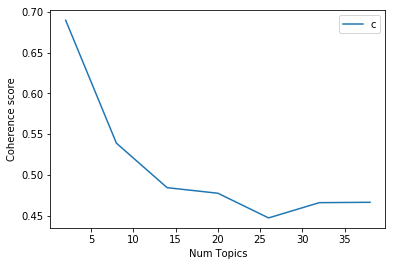

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

There is excellent coherence at the 5 topics I had used, so we will stay with that, in an effort to avoid being overly selective.

## A (Quasi) Supervised Approach

### Bag of Words

#### BoW with SKLearn CountVectorizer

In [72]:
df1 = X

In [73]:
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'microsoft',
                               'ai', 'ml', 'nlp', 'speech', 'natural', 'engineers', 'cloud',
                               'intelligence', 'aws']))

In [74]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_text(text):
    # 1. Remove HTML
    soup = BeautifulSoup(text)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower() 
    words = tok.tokenize(lower_case)

    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = stop_words                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    
    return (" ".join(words)).strip()

In [75]:
# remove punctuation from the job titles first
#X['job_description'] = X['job_description'].apply(clean_text)
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_text(X['job_description'][i])

In [76]:
X.head(1)

title  \
0  Research Scientist  Natural Language Processing   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [77]:
#split up for classification
y = X.job_class
X1 = X.job_description

In [78]:
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

vectorizer = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1, 1), max_df=.30, min_df=.10, max_features=None)
bow = vectorizer.fit_transform(X1)
print(vectorizer.get_feature_names())

['abilities', 'able', 'access', 'achieve', 'action', 'active', 'activities', 'additional', 'affirmative', 'age', 'agile', 'analytic', 'analytical', 'analyze', 'applicable', 'applicants', 'application', 'applied', 'apply', 'applying', 'approaches', 'appropriate', 'architecture', 'area', 'areas', 'around', 'art', 'artificial', 'assist', 'attention', 'available', 'bachelor', 'background', 'basic', 'basis', 'benefits', 'better', 'big', 'bring', 'bs', 'candidate', 'candidates', 'capabilities', 'care', 'career', 'center', 'challenges', 'challenging', 'change', 'changing', 'citizenship', 'class', 'classification', 'clearly', 'client', 'clients', 'closely', 'code', 'coding', 'collaborate', 'collaboration', 'collaborative', 'com', 'committed', 'communicate', 'community', 'companies', 'competitive', 'computing', 'concepts', 'conduct', 'consideration', 'content', 'continuous', 'contribute', 'control', 'core', 'creating', 'creative', 'critical', 'cross', 'culture', 'current', 'cutting', 'database'

In [80]:
#Split into X_train and X_test now that BoW is complete.
X_train, X_test= train_test_split(bow, test_size=0.25, random_state=42)

### Models to test initial Bag of Words

In [81]:
start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9924324324324324

Test set score: 0.5799136069114471
Done in 0.37194228172302246 seconds


In [82]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8872072072072072

Test set score: 0.5766738660907127
Done in 0.6600089073181152 seconds


In [83]:
start = time.time()
clf = XGBClassifier()  
clf.fit(X_train,y_train)  
clf.predict(X_test)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
cross_val = cross_val_score(clf, X_train, y_train)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8872072072072072

Test set score: 0.5766738660907127
Cross Validation Score: [0.70474138 0.68358531 0.67969598]
Cross Validation Mean: 0.6893408917042899
Done in 40.37527012825012 seconds


The BoW did not perform well, even with a boosted model. 

### K Means

In [84]:
# Normalize the data.
X_norm = normalize(X_train)

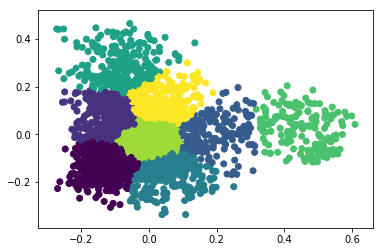

Done in 0.5970640182495117 seconds


In [85]:
start = time.time()
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in", end - start, "seconds")

Pretty nice clusters, with the exception of the variance of the top right green blob.

### KMeans Mini-Batch

In [86]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)
true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)

In [87]:
from time import time

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

print('Training set score:', rfc.score(X_train_norm, y_train))
print('\nTest set score:', rfc.score(X_test_norm, y_test))
t0 = time()
print("Done in %0.3fs" % (time() - t0))

Training set score: 0.990990990990991

Test set score: 0.5961123110151187
Done in 0.000s


In [88]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.7318918918918919

Test set score: 0.5885529157667386
Done in 0.19801783561706543 seconds


### LSA with BoW

In [89]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.7318918918918919

Test set score: 0.5885529157667386
Done in 0.1987440586090088 seconds


In [90]:
start = time.time()
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(bow)
terms = vectorizer.get_feature_names()
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")
end = time.time()
print("Done in", end - start, "seconds")

Concept 0:
understand
service
statistical
project
process
others
ensure
may
big
insights
 
Concept 1:
others
understand
service
duties
appropriate
procedures
essential
ensure
care
staff
 
Concept 2:
statistical
insights
analytical
methods
predictive
statistics
quantitative
project
analytic
stakeholders
 
Concept 3:
sales
enterprise
understand
others
architecture
marketing
project
client
clients
platform
 
Concept 4:
care
health
enterprise
project
staff
healthcare
ensure
medical
architecture
procedures
 
Done in 6.170415163040161 seconds


### Bigrams

In [91]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X1, y, test_size=0.25, random_state=42)
count_vect_bigram = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1,2), max_df=.30, min_df=.1, max_features=100000)
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train_clean)
test_data_bow_bigram = count_vect_bigram.transform(X_test_clean)

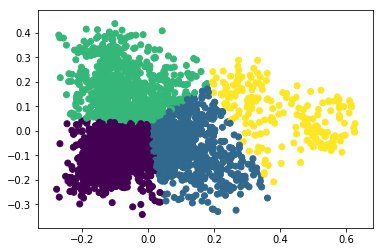

In [92]:
X_norm = normalize(train_data_bow_bigram)
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()

In [93]:
y.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [94]:
labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

Training set score: 0.9063063063063063

Test set score: 0.5896328293736501
Cross-Valid Bigram Fold Results are:  [0.60283688 0.55516014 0.57857143 0.58214286 0.62589928 0.59636364
 0.58545455 0.56       0.53818182 0.62043796]
Mean of Folds are =  0.5845048544275583
Done in %0.3fs 6.790798902511597


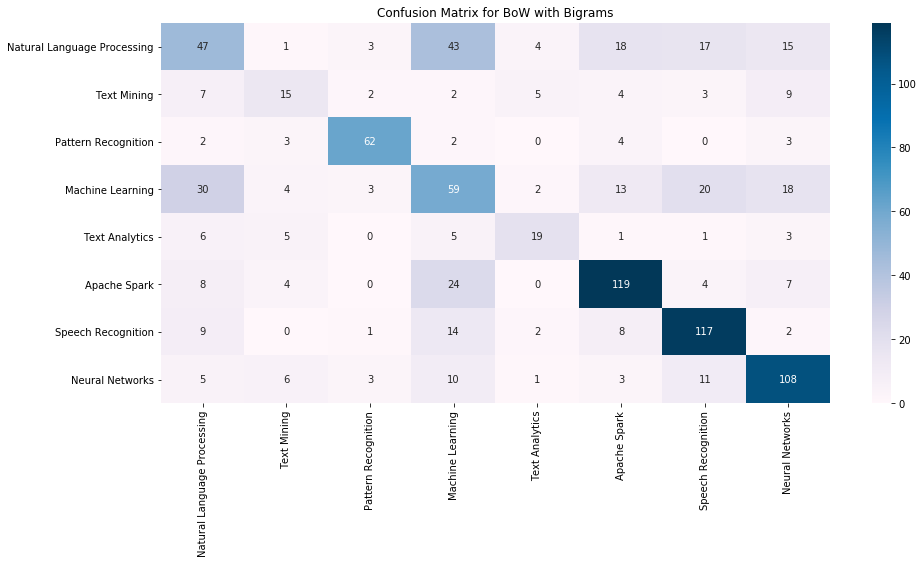

In [95]:
import time
start = time.time()

#Confusion matrix for Bigram BOW with Logistic Regression

lr = LogisticRegression()
lr.fit(train_data_bow_bigram,y_train)

print('Training set score:', lr.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', lr.score(test_data_bow_bigram, y_test_clean))

y_pred = lr.predict(test_data_bow_bigram)

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')
crs = cross_val_score(lr, train_data_bow_bigram, y_train_clean, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())
end = time.time()
print("Done in %0.3fs", end - start)
#conf = confusion_matrix(y_test_clean, bigram_pred, labels = labels)

#df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  #columns = [i for i in labels])
#plt.figure(figsize = (15,7))
#sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [96]:
import time
start = time.time()

clf = XGBClassifier(silent=True, 
                    scale_pos_weight=1,
                    learning_rate=0.01,  
                    colsample_bytree = 0.4,
                    subsample = 0.85,
                    objective='binary:logistic', 
                    n_estimators=600, 
                    reg_alpha = 0.3,
                    max_depth=7, 
                    gamma=1)  
clf.fit(train_data_bow_bigram,y_train)
y_pred = clf.predict(test_data_bow_bigram)
#bigram_pred = clf.predict(test_data_bow_bigram.toarray())
print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9603603603603603

Test set score: 0.7062634989200864
Cross Validation Score: [0.71012931 0.71166307 0.67535288]
Cross Validation Mean: 0.6990484182022486
Done in 251.13227820396423 seconds


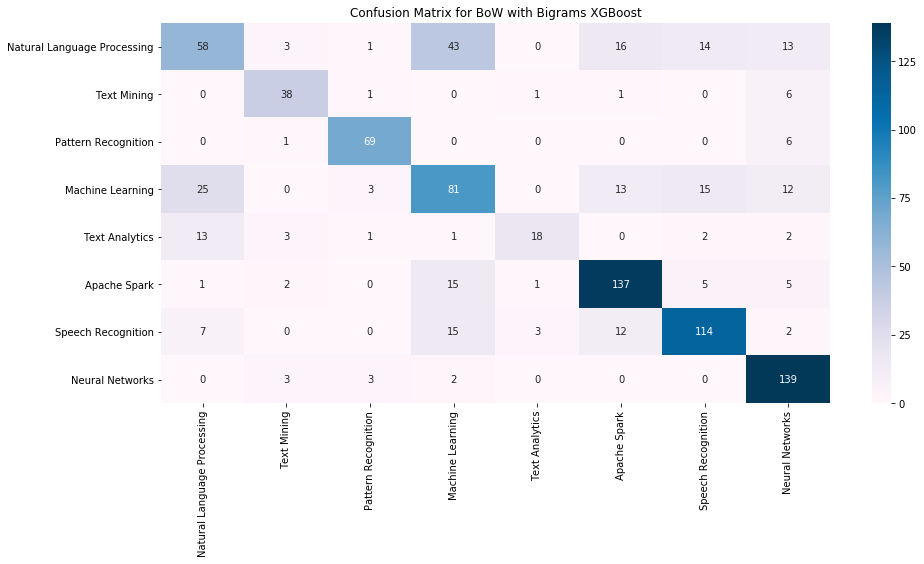

In [97]:
#Confusion matrix for XGB performance visualization on bigrams

labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams XGBoost')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')

## TF-IDF Analysis

### Train and Test Sets


In [98]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)
tfidf.shape

(3701, 414)

In [99]:
X_train_tfidf, X_test_tfidf = train_test_split(tfidf, test_size=0.25, random_state=42)

In [100]:
import time

start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9931531531531531

Test set score: 0.5961123110151187
Done in 0.3352367877960205 seconds


In [101]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)

print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.7315315315315315

Test set score: 0.5907127429805615
Done in 0.1951289176940918 seconds


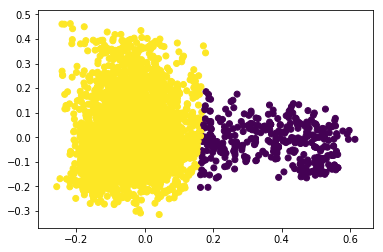

Done in %0.3fs 0.47443509101867676


In [102]:
start = time.time()
# Normalize the data.
X_normt = normalize(tfidf)
# Reduce it to two components.
X_pcat = PCA(2).fit_transform(X_normt.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pcat)

# Plot the solution.
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in %0.3fs", end - start)

In [103]:
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'microsoft',
                               'ai', 'ml', 'nlp', 'speech', 'natural', 'engineers', 'cloud',
                               'intelligence', 'aws']))

In [116]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

vectorizer1 = TfidfVectorizer(#max_df=0.2, # drop words that occur in more than half the job descriptions
                             #min_df=10, # only use words that appear at least 10x
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

X_train_tfidf = vectorizer1.fit_transform(X_train_clean)
X_test_tfidf = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

Training set score: 0.9938738738738738

Test set score: 0.6339092872570194
Done in %0.3fs 2.389164924621582


In [109]:
df1.head(10)

job_description  \
0  conduent is the world s largest provider of diversified business process services with leading capabilities in transaction processing automation analytics and constituent experience we work with both government and commercial customers in assisting them to deliver quality services to the people they serve we manage interactions with patients and the insured for a significant portion of the u s healthcare industry we are the customer interface for large segments of the technology industry and the operational and processing partner of choice for public transportation systems around the world whether it s digital payments claims processing benefit administration automated tolling customer care or distributed learning conduent manages and modernizes these interactions to create value for both our clients and their constituents learn more at www conduent com research scientist natural language processing for the world s largest provider of diversified bpo services wouldn t it be great to use your natural language processing nlp experience to improve the lives of citizens patients and employees around the world at conduent we re building algorithms and tools that do exactly that if you re interested in an exciting innovative position that allows you to leverage these skills then you re just the kind of person we re looking for conduent is enhancing its platforms in transportation healthcare financial services and customer care with predictive and prescriptive analytics because of the broad range of fields we provide services for you can be assured of not being pigeonholed into a narrow domain and continue to be challenged by applying the latest advances in the field we work with both government and commercial customers in assisting them to deliver quality services to the people they serve at conduent you will use your knowledge and training to take the everyday services that our clients are using and add analytics automation intelligence to make these more efficient more usable more exciting and more functional more about us conduent labs works closely with conduent business groups to addresses real world challenges such as the rising cost of healthcare mobility in urban society and payment card fraud in financial welfare programs we adopt a multidisciplinary approach that combines techniques from diverse domains such as machine learning statistical modeling simulation optimization and multimedia analysis and use big data technologies to consolidate and analyze volumes of data from multiple sources in a scalable manner our work is guided by insights from ethnographic analysis and deep domain knowledge from both in house and external experts fast facts b in global business million people estimated to travel through conduent managed toll systems daily our research team has generated over patents and counting of managed u s healthcare plans are clients provider of parking solutions in the u s with award winning innovation of top u s mobile service providers rely on us to deliver customer care position description the research scientist will apply their skills to work at the leading edge of automation in industries such as customer care healthcare social media education and legal and compliance solutions our call centers support a diverse set of clients where automating understanding of the intent the topics and the sentiment of the conversation will lead to a better customer experience in our education services we seek to understand the training needs of our clients and evaluate their effective delivery through free text analysis content moderation is a growing problem and being able to automate the process of determine if text and other content posted to social media violates policies would have great value the nlp scientist will identify use cases create demonstrations of capabilities and identify new opportunities in these and other conduent businesses responsibilities the natural language processing research s

In [110]:
df1 = df1.drop(['title', 'gender_breakdown'], axis = 1)

KeyError: "['title' 'gender_breakdown'] not found in axis"

In [119]:
start = time.time()
X = df1
X_norm_tfidf = normalize(vectorizer1.fit_transform(X))

true_k = 8
labels = y 
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

print("Clustering sparse data with %s" % km)
km.fit(X_norm_tfidf)
mini_labels = km.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm_tfidf, km.labels_, sample_size=5000))
end = time.time()
print("Done in %0.3fs", end - start)

Clustering sparse data with MiniBatchKMeans(batch_size=5000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)


ValueError: n_samples=2 should be >= n_clusters=8

In [ ]:
len(y)

In [ ]:
len(mini_labels)

In [ ]:
mini_labels.shape

In [ ]:
df1['MiniBatchLabels'] = mini_labels

In [ ]:
for label in set(mini_labels):
    print('Cluster: %d' % label)
    print(df1[df1.MiniBatchLabels == label].groupby('job_class').count())
    print('')

In [ ]:
#Let's check Cluster 0 
shuffle(df1[df1.MiniBatchLabels == 0]).head(10)

In [ ]:
#Let's check Cluster 1
shuffle(df1[df1.MiniBatchLabels == 1]).head(10)

In [ ]:
#Cluster 2
shuffle(df1[df1.MiniBatchLabels == 2]).head(10)

### LSA with TF-IDF

In [ ]:
print("Number of features: %d" % X_train_tfidf.get_shape()[1])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to about 10% of the original.
svd= TruncatedSVD(2100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of job descriptions our solution considers similar, for the first five identified topics
jobs_by_component=pd.DataFrame(X_train_lsa, index=list(X_train))
for i in range(5):
    print('Component {}:'.format(i))
    print(jobs_by_component.loc[:,i].sort_values(ascending=False)[0:10])
import time
print(time.time())

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(tfidf)
terms = vectorizer.get_feature_names()

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

In [ ]:
#Try a GBM classifier here, using TF-IDF 

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
tfidf_pred = clf.predict(X_test_tfidf.toarray())

print('Training set score:', clf.score(X_train_tfidf.toarray(), y_train))
print('\nTest set score:', clf.score(X_test_tfidf.toarray(), y_test))

In [ ]:
#Confusion matrix for GBM performance visualization on TF-IDF

conf = confusion_matrix(y_test, tfidf_pred, labels = labels)

df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
X_train_tfidf.shape

In [ ]:
#LSA with Tf-idf
mlp = neural_network.MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic')
train = mlp.fit(X_train_lsa, y_train)
mlp_y_pred = mlp.predict(X_test_lsa)

print('Training set score:', mlp.score(X_train_lsa, y_train))
print('\nTest set score:', mlp.score(X_test_lsa, y_test))